In [1]:
import os
from ms2deepscore.MS2DeepScore import MS2DeepScore
from ms2deepscore.models.load_model import load_model
from matchms.importing.load_from_mgf import load_from_mgf
from ms2deepscore.utils import load_pickled_file

data_folder = os.path.join("../../../data/pytorch/gnps_21_08_23_min_5_at_5_percent/")
both_mode_folder = "trained_models/both_mode_precursor_mz_ionmode_2000_2000_2000_layers_500_embedding_2024_01_31_11_51_10/"

# True values
pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_true_values.pickle"))
neg_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_true_values.pickle"))
neg_pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_true_values.pickle"))

# Validation spectra
pos_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "positive_validation_spectra.mgf")))
neg_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "negative_validation_spectra.mgf")))

# Cosine predictions
neg_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_scores.pickle"))["score"]
pos_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "positive_scores.pickle"))["score"]
neg_pos_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Mod Cosine predictions
neg_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "negative_scores.pickle"))["score"]
pos_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "positive_scores.pickle"))["score"]
neg_pos_mod_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Both models predictions
pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
neg_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
neg_pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# Pos mode predictions
pos_mode_folder = "trained_models/positive_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_10_27_04/"
pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
neg_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
neg_pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# neg mode predictions
neg_mode_folder = "trained_models/negative_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_11_53_37/"
pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
neg_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
neg_pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))


## Sample pos results

In [2]:
from ms2deepscore.benchmarking.select_spectrum_pairs_for_visualization import sample_spectra_multiple_times
import numpy as np
np.random.seed(42)
sampled_pos_both_mode, pos_combined_true_values = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                      val_spectra_other_mode=pos_spectra,
                                                      predicted_values=pos_predictions_both_mode,
                                                      true_values=pos_true_values,
                                                      nr_of_sample_times=10)
np.random.seed(42)
sampled_pos_cosine, _ = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=pos_cosine_predictions,
                                                   true_values=pos_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_mod_pos_cosine, _ = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=pos_mod_cosine_predictions,
                                                   true_values=pos_true_values,
                                                   nr_of_sample_times=10)

np.random.seed(42)
sampled_pos_predictions_pos_mode, _ = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=pos_predictions_pos_mode,
                                                   true_values=pos_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_pos_predictions_neg_mode, _ = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=pos_predictions_neg_mode,
                                                   true_values=pos_true_values,
                                                   nr_of_sample_times=10)


Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.24it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.12it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.13it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.85it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.93it/s]


## Neg sampling predictions

In [3]:
from ms2deepscore.benchmarking.select_spectrum_pairs_for_visualization import sample_spectra_multiple_times
import numpy as np
np.random.seed(42)
sampled_neg_both_mode, neg_combined_true_values = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                      val_spectra_other_mode=neg_spectra,
                                                      predicted_values=neg_predictions_both_mode,
                                                      true_values=neg_true_values,
                                                      nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_cosine, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=neg_spectra,
                                                   predicted_values=neg_cosine_predictions,
                                                   true_values=neg_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_mod_neg_cosine, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=neg_spectra,
                                                   predicted_values=neg_mod_cosine_predictions,
                                                   true_values=neg_true_values,
                                                   nr_of_sample_times=10)

np.random.seed(42)
sampled_neg_predictions_pos_mode, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=neg_spectra,
                                                   predicted_values=neg_predictions_pos_mode,
                                                   true_values=neg_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_predictions_neg_mode, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=neg_spectra,
                                                   predicted_values=neg_predictions_neg_mode,
                                                   true_values=neg_true_values,
                                                   nr_of_sample_times=10)

Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 13.80it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 13.73it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 13.81it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 13.65it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████

## Neg_pos sampling predictions

In [4]:
from ms2deepscore.benchmarking.select_spectrum_pairs_for_visualization import sample_spectra_multiple_times
import numpy as np
np.random.seed(42)
sampled_neg_pos_both_mode, neg_pos_combined_true_values = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                      val_spectra_other_mode=pos_spectra,
                                                      predicted_values=neg_pos_predictions_both_mode,
                                                      true_values=neg_pos_true_values,
                                                      nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_pos_cosine, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=neg_pos_cosines_predictions,
                                                   true_values=neg_pos_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_pos_mod_cosine, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=neg_pos_mod_cosines_predictions,
                                                   true_values=neg_pos_true_values,
                                                   nr_of_sample_times=10)

np.random.seed(42)
sampled_neg_pos_predictions_pos_mode, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=neg_pos_predictions_pos_mode,
                                                   true_values=neg_pos_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_pos_predictions_neg_mode, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=neg_pos_predictions_neg_mode,
                                                   true_values=neg_pos_true_values,
                                                   nr_of_sample_times=10)

Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.19it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.20it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.20it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.24it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████

## plotting reversed stacked_histogram_plot

In [6]:
from ms2deepscore.benchmarking.plot_stacked_histogram import get_recall_value, calculate_all_histograms, plot_stacked_histogram
import matplotlib.pyplot as plt

def plot_reversed_stacked_histogram_plot(tanimoto_scores: np.array,
                                         ms2deepscore_predictions: np.array,
                                         title="",
                                         ms2deepscore_nr_of_bin_correction=1.0,
                                         max_height=2.0):
    if tanimoto_scores.max() > 1 or tanimoto_scores.min() < 0:
        raise ValueError("The tanimoto score predictions are not between 0 and 1. "
                         "Ms2deepscore predictions and tanimoto score predictions might be accidentally reversed")

    ms2deepscore_bins = np.array(
        [0,
         get_recall_value(ms2deepscore_predictions, 0.01),
         get_recall_value(ms2deepscore_predictions, 0.0015),
         get_recall_value(ms2deepscore_predictions, 0.0009),
         get_recall_value(ms2deepscore_predictions, 0.0003),
         get_recall_value(ms2deepscore_predictions, 0.0001),
         1])

    normalized_counts_per_bin, used_ms2deepscore_bins_per_bin, percentage_of_total_pairs_per_bin = \
        calculate_all_histograms(ms2deepscore_predictions, tanimoto_scores, ms2deepscore_bins,
                                 ms2deepscore_nr_of_bin_correction, max_height=max_height)

    plot_stacked_histogram(normalized_counts_per_bin, used_ms2deepscore_bins_per_bin, percentage_of_total_pairs_per_bin,
                           ms2deepscore_bins, x_label="Tanimoto similarity", y_label="Prediction", title=title)
    plt.show()


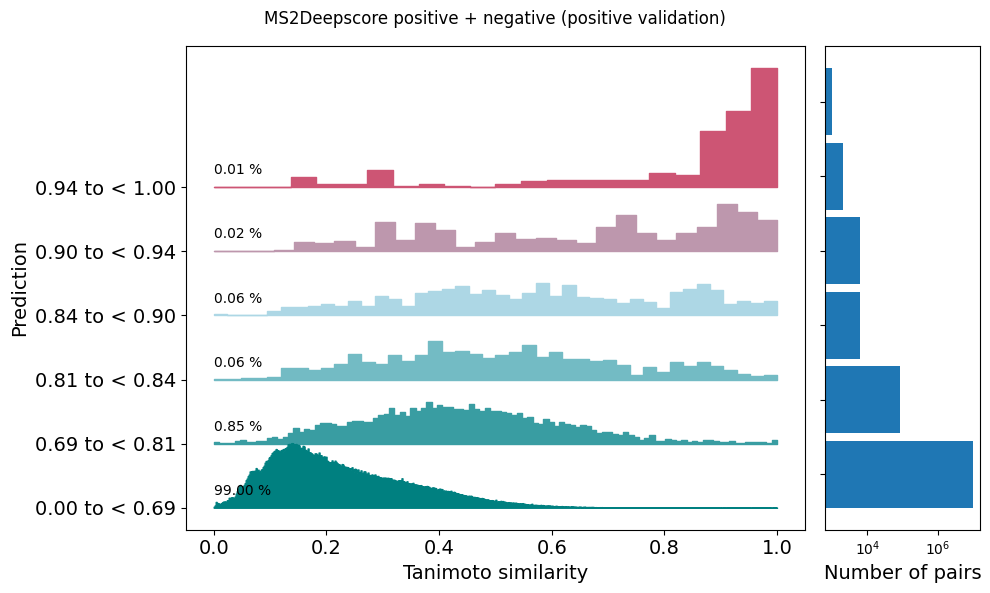

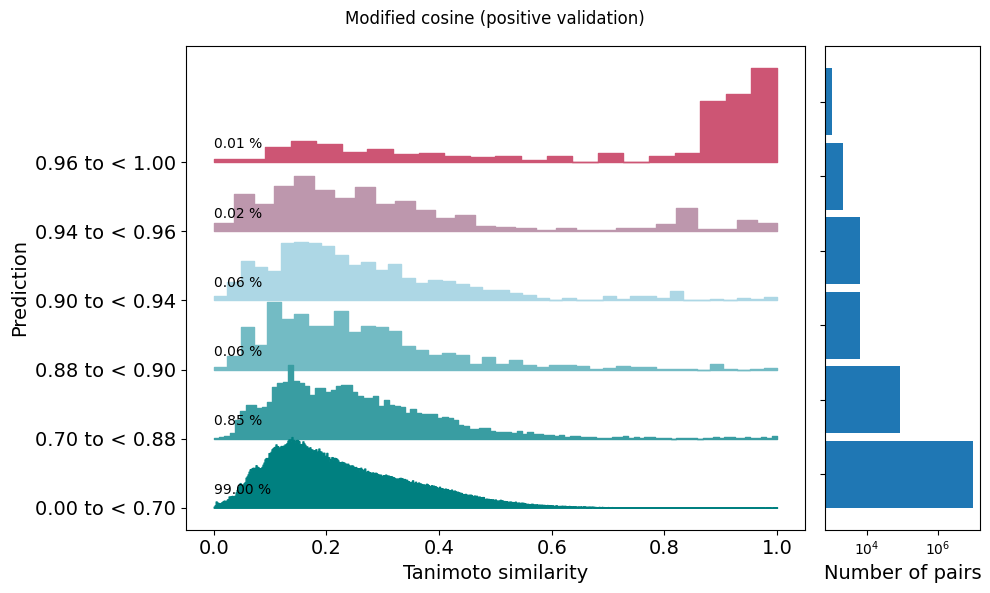

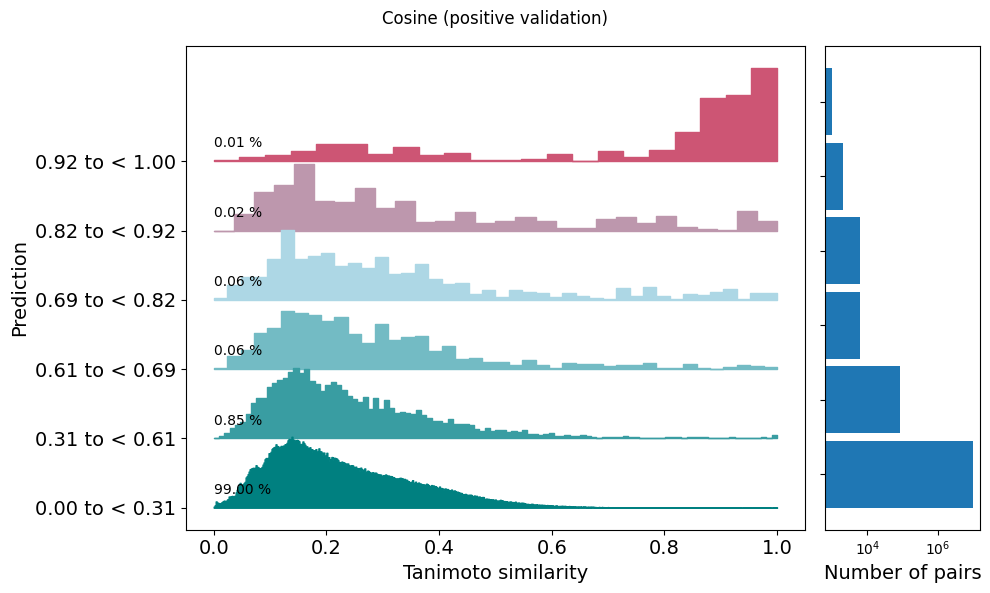

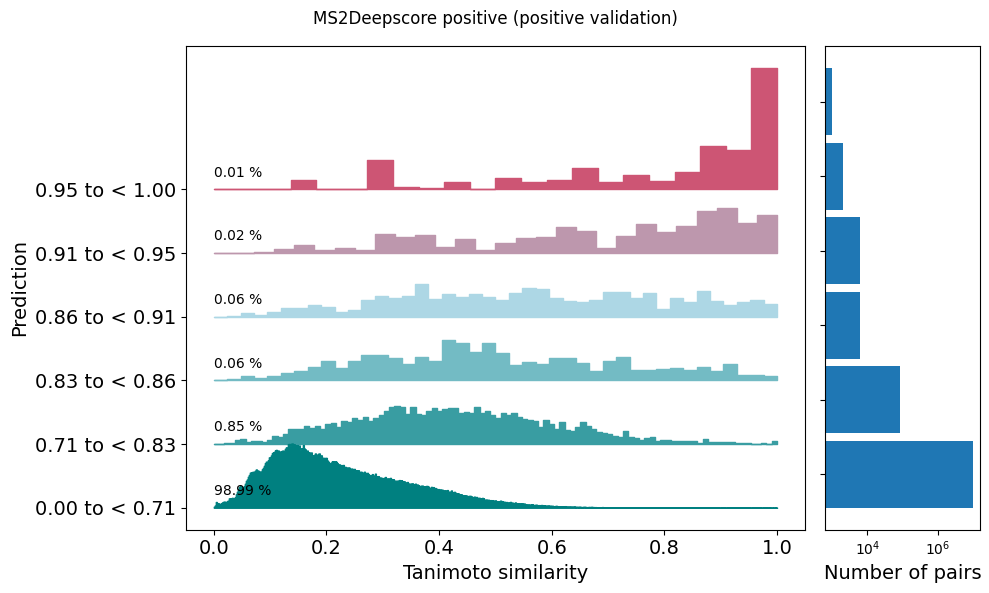

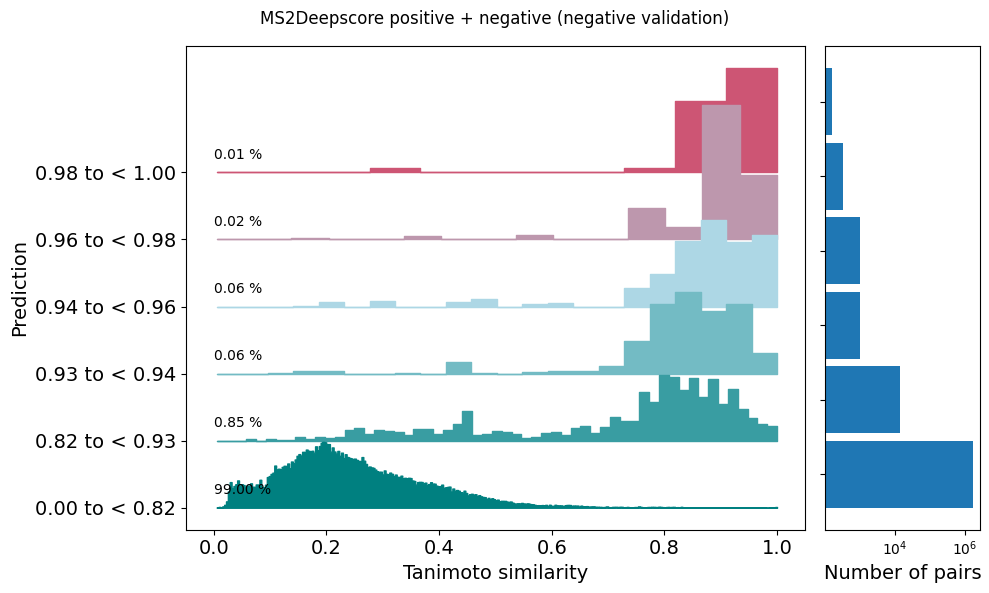

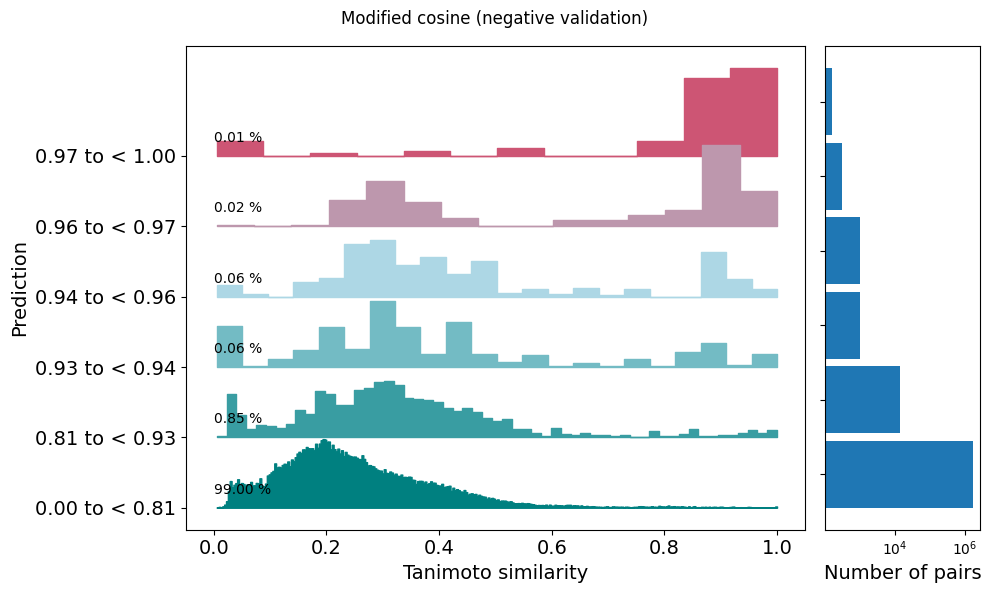

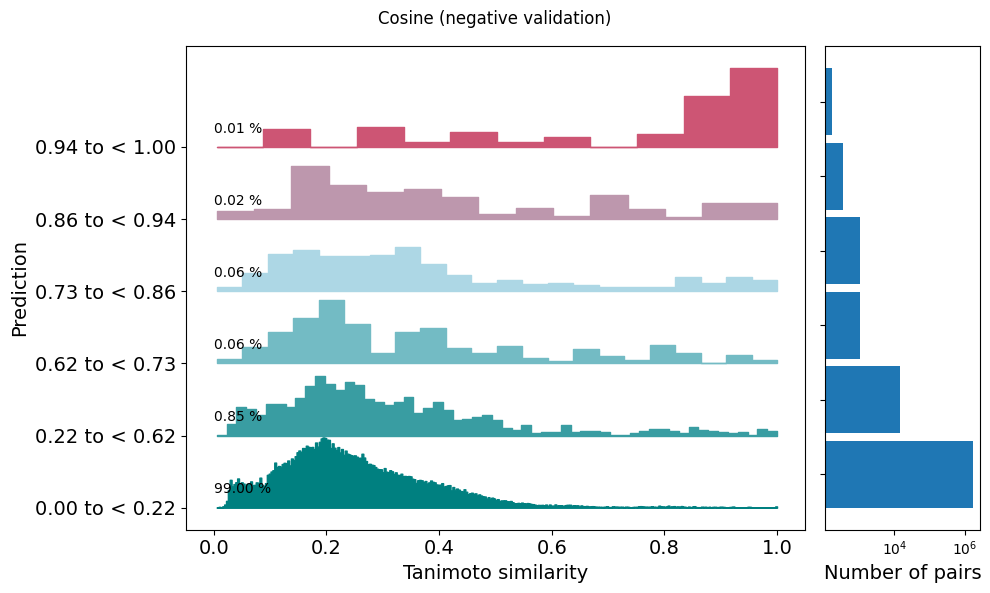

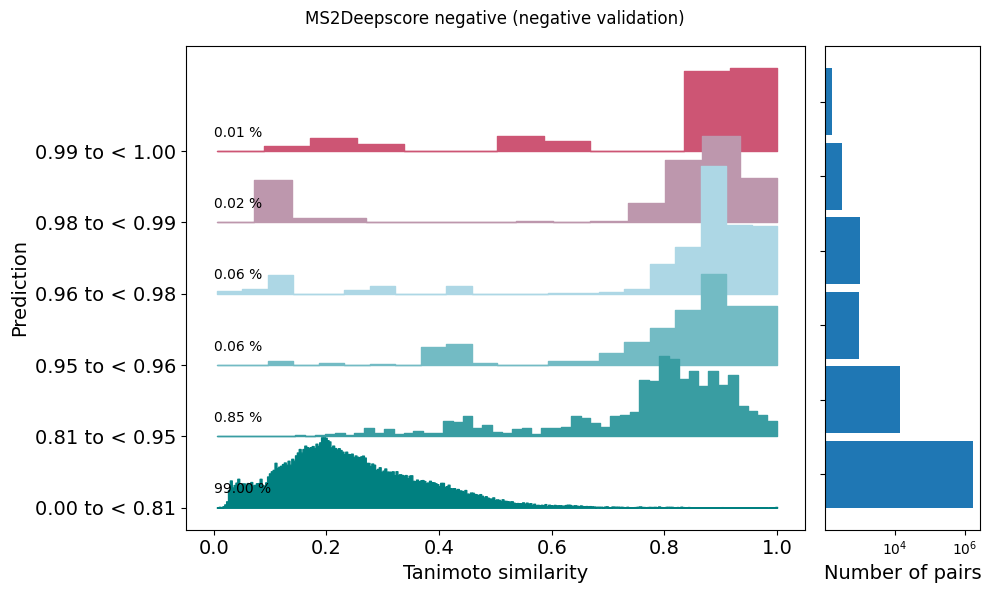

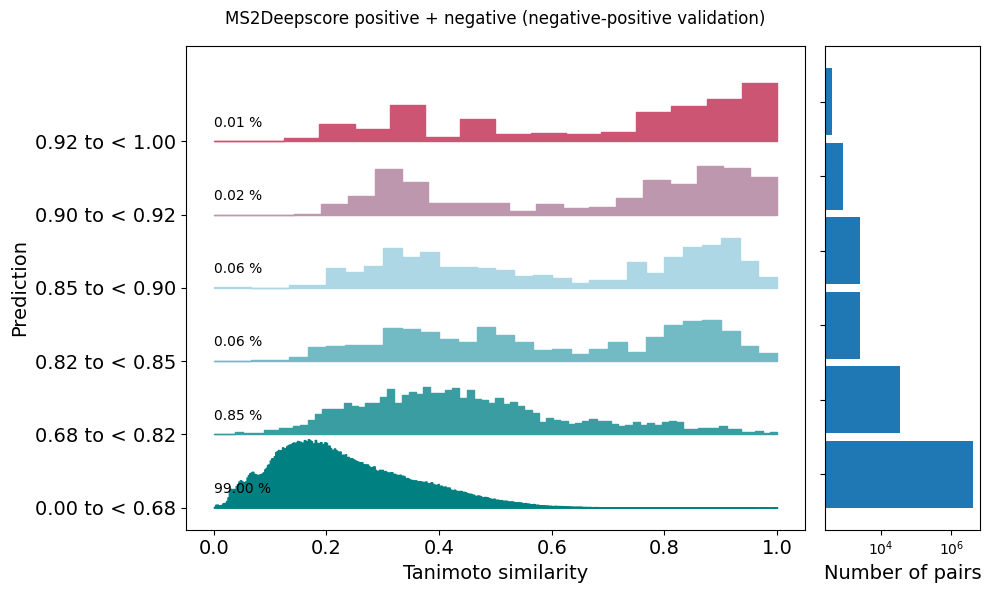

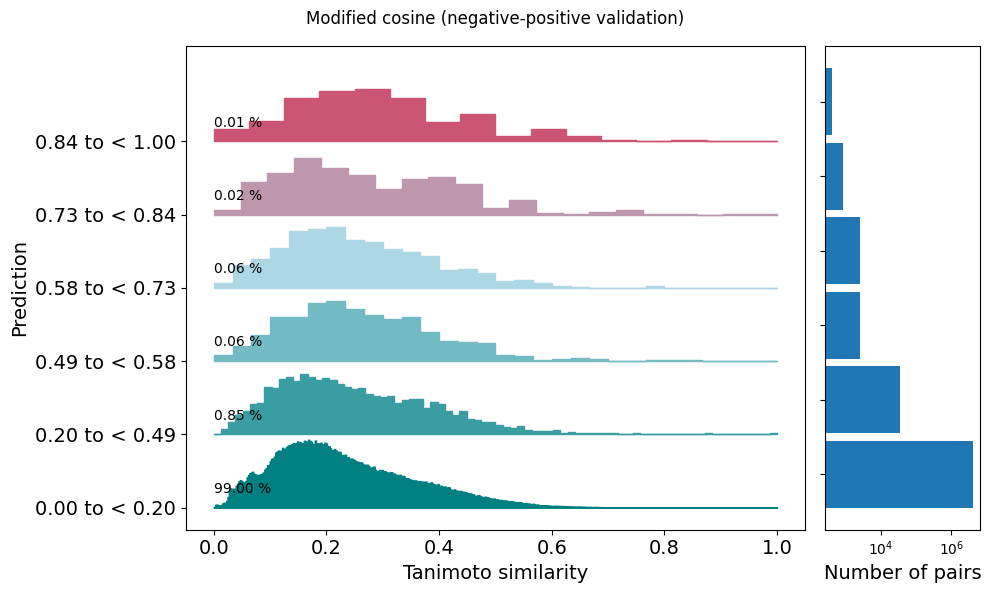

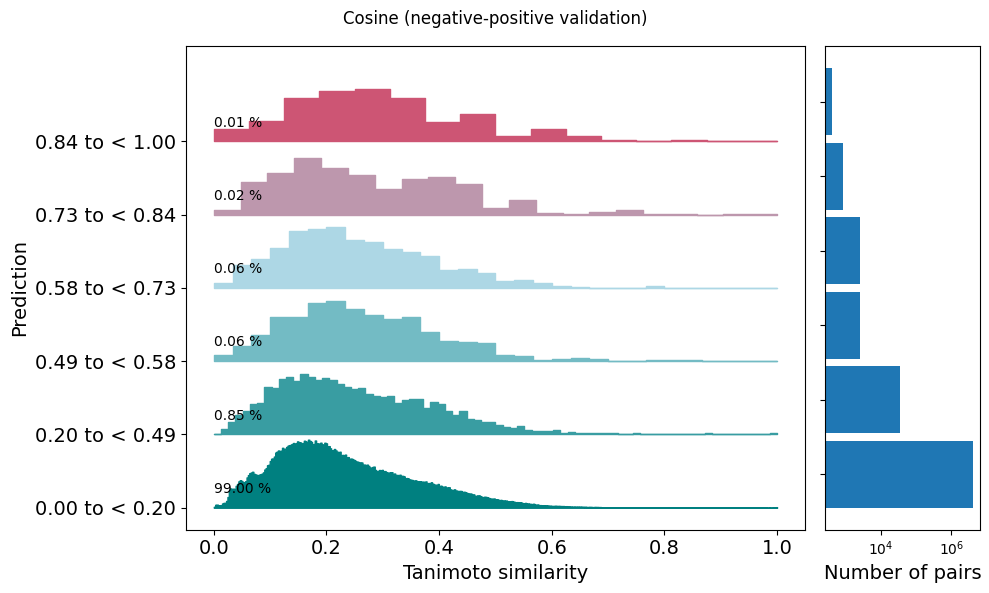

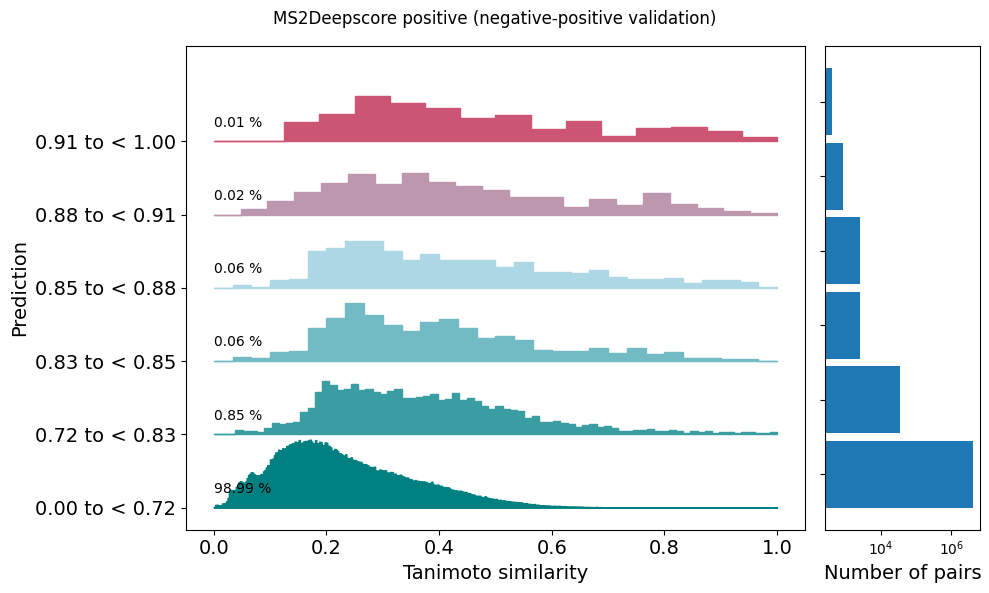

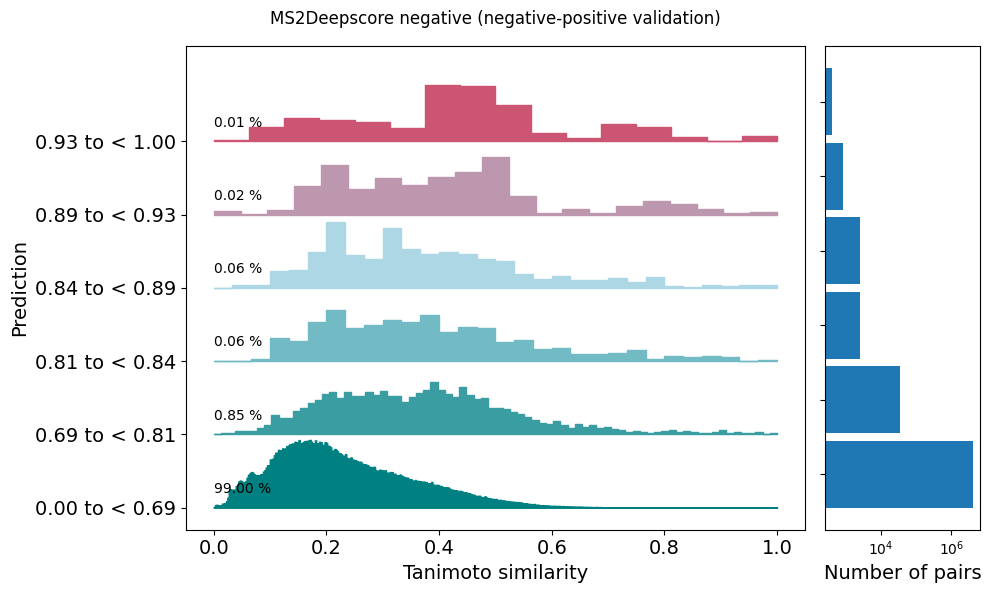

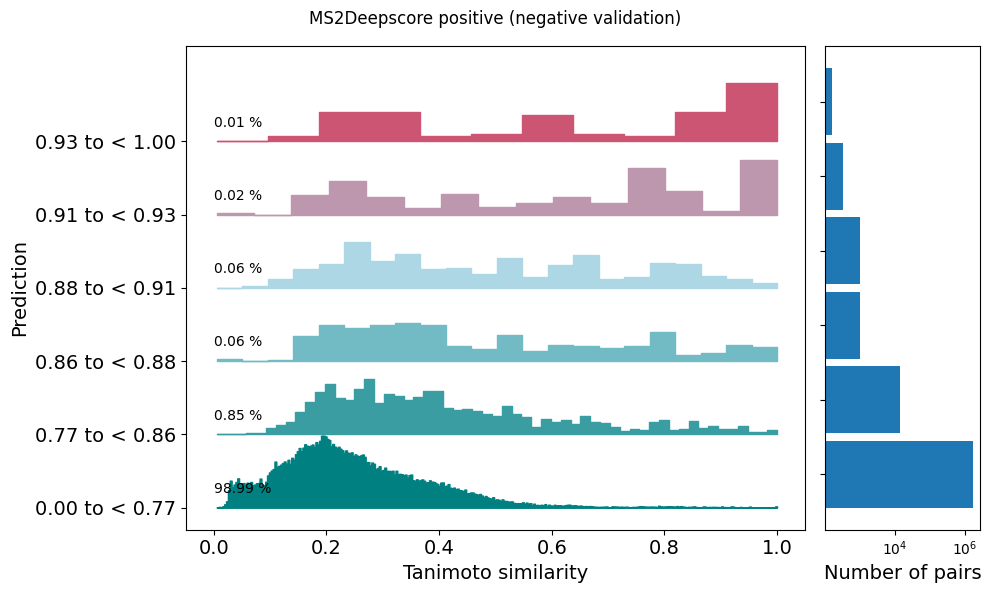

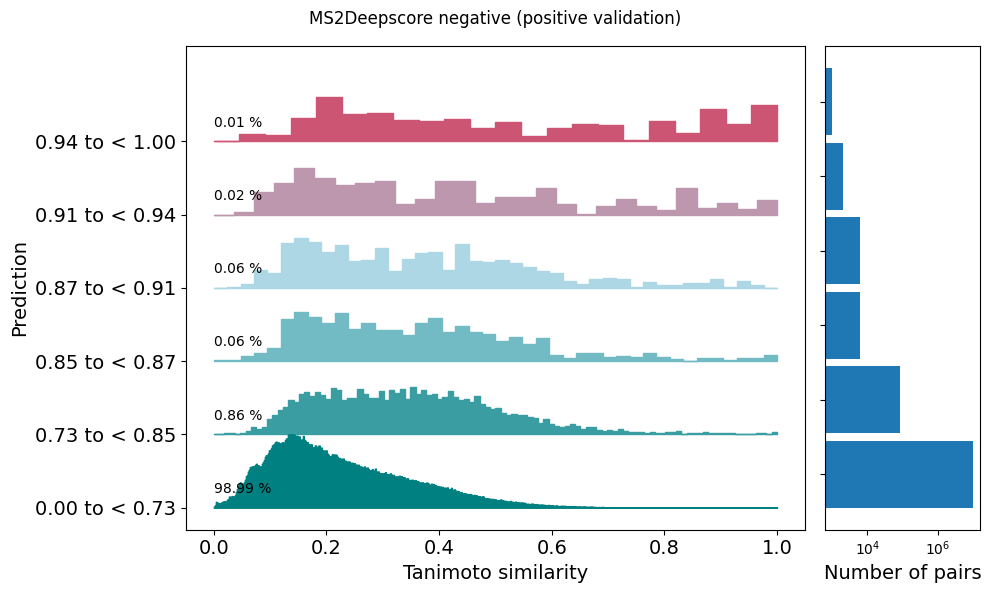

In [7]:
plot_reversed_stacked_histogram_plot(pos_combined_true_values, sampled_pos_both_mode, title="MS2Deepscore positive + negative (positive validation)")
plot_reversed_stacked_histogram_plot(pos_combined_true_values, sampled_mod_pos_cosine, title="Modified cosine (positive validation)")
plot_reversed_stacked_histogram_plot(pos_combined_true_values, sampled_pos_cosine, title="Cosine (positive validation)")
plot_reversed_stacked_histogram_plot(pos_combined_true_values, sampled_pos_predictions_pos_mode, title="MS2Deepscore positive (positive validation)")
plot_reversed_stacked_histogram_plot(neg_combined_true_values, sampled_neg_both_mode, title="MS2Deepscore positive + negative (negative validation)")
plot_reversed_stacked_histogram_plot(neg_combined_true_values, sampled_mod_neg_cosine, title="Modified cosine (negative validation)")
plot_reversed_stacked_histogram_plot(neg_combined_true_values, sampled_neg_cosine, title="Cosine (negative validation)")
plot_reversed_stacked_histogram_plot(neg_combined_true_values, sampled_neg_predictions_neg_mode, title="MS2Deepscore negative (negative validation)")
plot_reversed_stacked_histogram_plot(neg_pos_combined_true_values, sampled_neg_pos_both_mode, title="MS2Deepscore positive + negative (negative-positive validation)")
plot_reversed_stacked_histogram_plot(neg_pos_combined_true_values, sampled_neg_pos_mod_cosine, title="Modified cosine (negative-positive validation)")
plot_reversed_stacked_histogram_plot(neg_pos_combined_true_values, sampled_neg_pos_cosine, title="Cosine (negative-positive validation)")
plot_reversed_stacked_histogram_plot(neg_pos_combined_true_values, sampled_neg_pos_predictions_pos_mode, title="MS2Deepscore positive (negative-positive validation)")
plot_reversed_stacked_histogram_plot(neg_pos_combined_true_values, sampled_neg_pos_predictions_neg_mode, title="MS2Deepscore negative (negative-positive validation)")
plot_reversed_stacked_histogram_plot(neg_combined_true_values, sampled_neg_predictions_pos_mode, title="MS2Deepscore positive (negative validation)")
plot_reversed_stacked_histogram_plot(pos_combined_true_values, sampled_pos_predictions_neg_mode, title="MS2Deepscore negative (positive validation)")

## Plotting normal stacked histograms

In [13]:
from ms2deepscore.benchmarking.plot_stacked_histogram import calculate_all_histograms, plot_stacked_histogram



def plot_stacked_histogram_plot_wrapper(tanimoto_scores: np.array,
                                        ms2deepscore_predictions: np.array,
                                        n_bins,
                                        title="",
                                        ms2deepscore_nr_of_bin_correction=10.0,
                                        max_height=2.0):
    """Create histogram based score comparison.

        Parameters
    ----------
    tanimoto_scores
        A numpy array matrix with the tanimoto scores
    ms2deepscore_predictions
        A numpy array matrix with the ms2deepscore predictions
    n_bins
        Number of bins. The default is 5.
    ms2deepscore_nr_of_bin_correction
        The number of bins used for the ms2deepscore bins is automated based on the number of pairs in a tanimoto bin,
        to make it always fit in the figure. By changing ms2deepscore_nr_of_bin_correction, the starting nr of bins for
        the ms2deepscore histograms is changed.
    """

    if tanimoto_scores.max() > 1 or tanimoto_scores.min() < 0:
        raise ValueError("The tanimoto score predictions are not between 0 and 1. "
                         "Ms2deepscore predictions and tanimoto score predictions might be accidentally reversed")
    tanimoto_bins = np.linspace(0, 1, n_bins + 1)
    tanimoto_bins[-1] = 1.0000000001

    normalized_counts_per_bin, used_ms2deepscore_bins_per_bin, total_pairs_per_bin = \
        calculate_all_histograms(tanimoto_scores, ms2deepscore_predictions, tanimoto_bins,
                                 ms2deepscore_nr_of_bin_correction, max_height)

    plot_stacked_histogram(normalized_counts_per_bin, used_ms2deepscore_bins_per_bin, total_pairs_per_bin,
                           tanimoto_bins, "Prediction", "Tanimoto similarity", title)

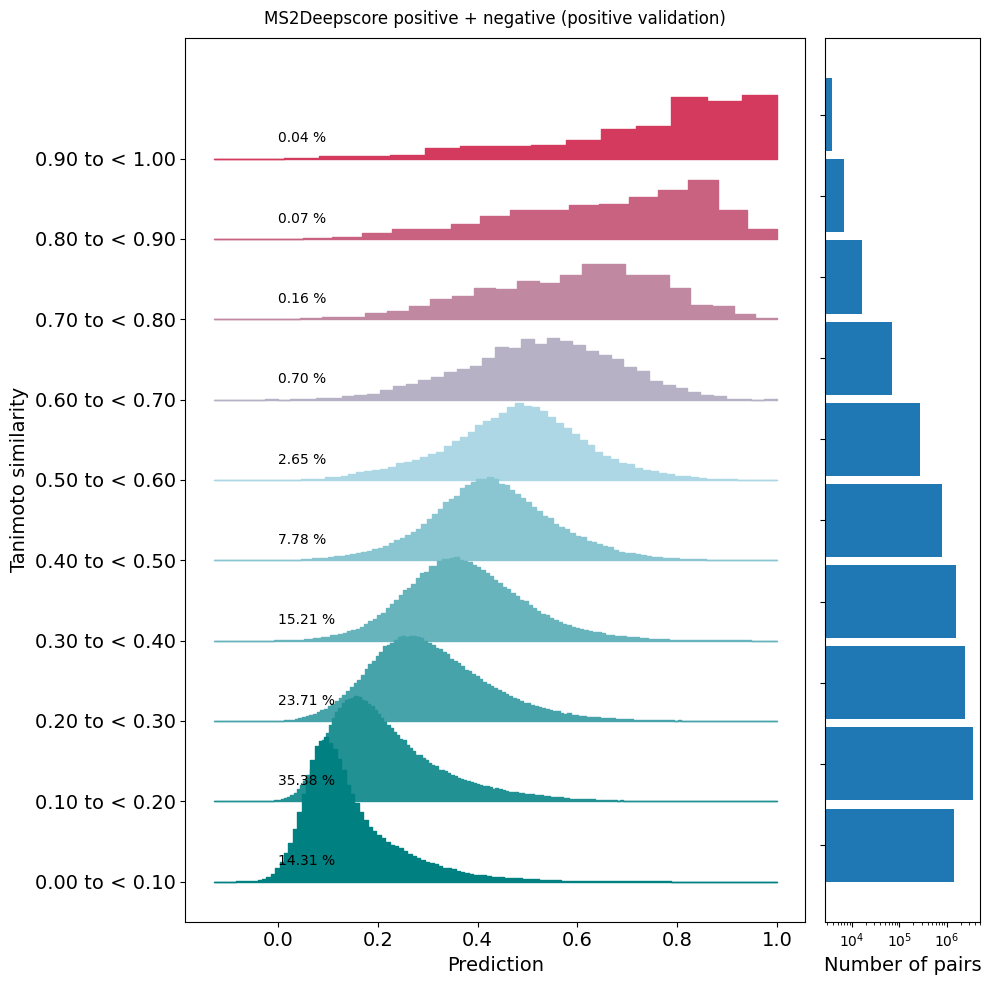

One peak was too high, trying 116 bins
One peak was too high, trying 105 bins
One peak was too high, trying 95 bins
One peak was too high, trying 86 bins
One peak was too high, trying 78 bins
One peak was too high, trying 70 bins
One peak was too high, trying 63 bins
One peak was too high, trying 57 bins
One peak was too high, trying 51 bins
One peak was too high, trying 46 bins
One peak was too high, trying 41 bins
One peak was too high, trying 37 bins
One peak was too high, trying 33 bins
One peak was too high, trying 29 bins
One peak was too high, trying 26 bins
One peak was too high, trying 23 bins
One peak was too high, trying 20 bins
One peak was too high, trying 18 bins
One peak was too high, trying 16 bins
One peak was too high, trying 14 bins
One peak was too high, trying 12 bins
One peak was too high, trying 10 bins
One peak was too high, trying 9 bins
One peak was too high, trying 160 bins
One peak was too high, trying 145 bins
One peak was too high, trying 131 bins
One peak

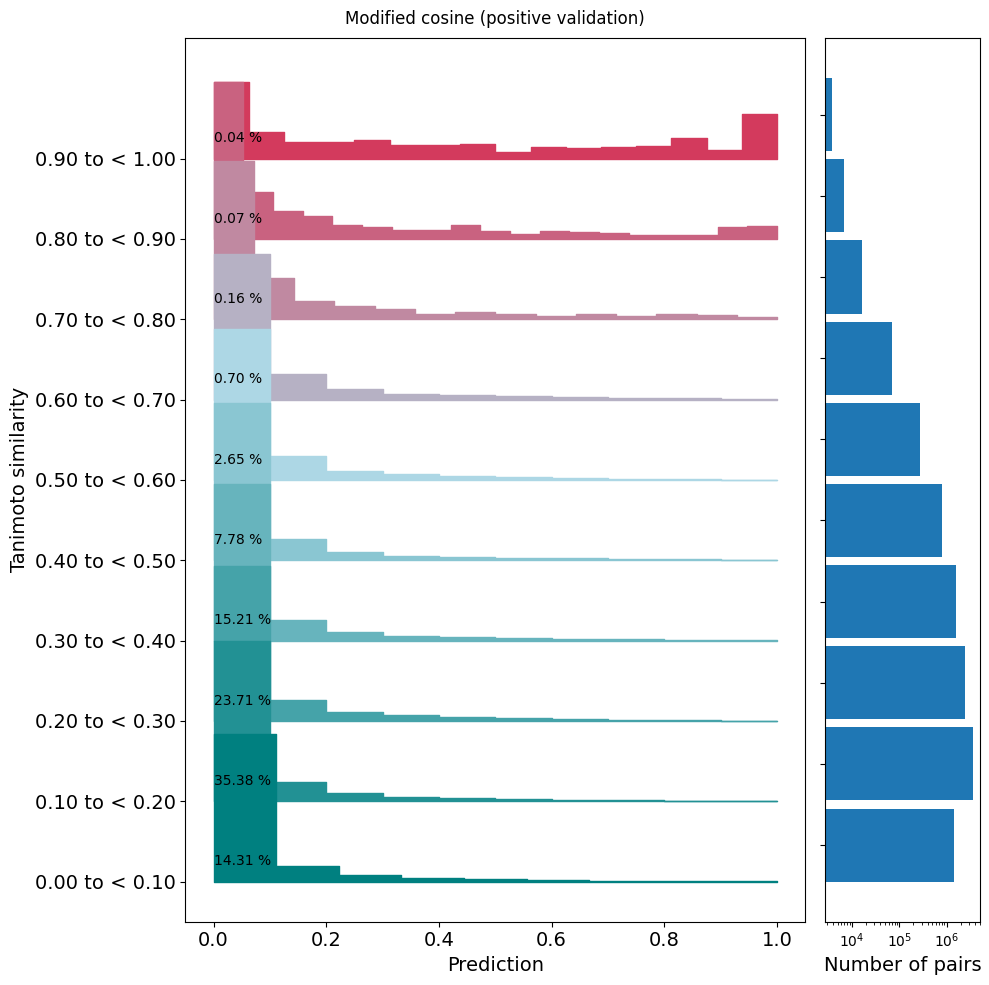

One peak was too high, trying 116 bins
One peak was too high, trying 105 bins
One peak was too high, trying 95 bins
One peak was too high, trying 86 bins
One peak was too high, trying 78 bins
One peak was too high, trying 70 bins
One peak was too high, trying 63 bins
One peak was too high, trying 57 bins
One peak was too high, trying 51 bins
One peak was too high, trying 46 bins
One peak was too high, trying 41 bins
One peak was too high, trying 37 bins
One peak was too high, trying 33 bins
One peak was too high, trying 29 bins
One peak was too high, trying 26 bins
One peak was too high, trying 23 bins
One peak was too high, trying 20 bins
One peak was too high, trying 18 bins
One peak was too high, trying 16 bins
One peak was too high, trying 14 bins
One peak was too high, trying 12 bins
One peak was too high, trying 10 bins
One peak was too high, trying 9 bins
One peak was too high, trying 8 bins
One peak was too high, trying 160 bins
One peak was too high, trying 145 bins
One peak w

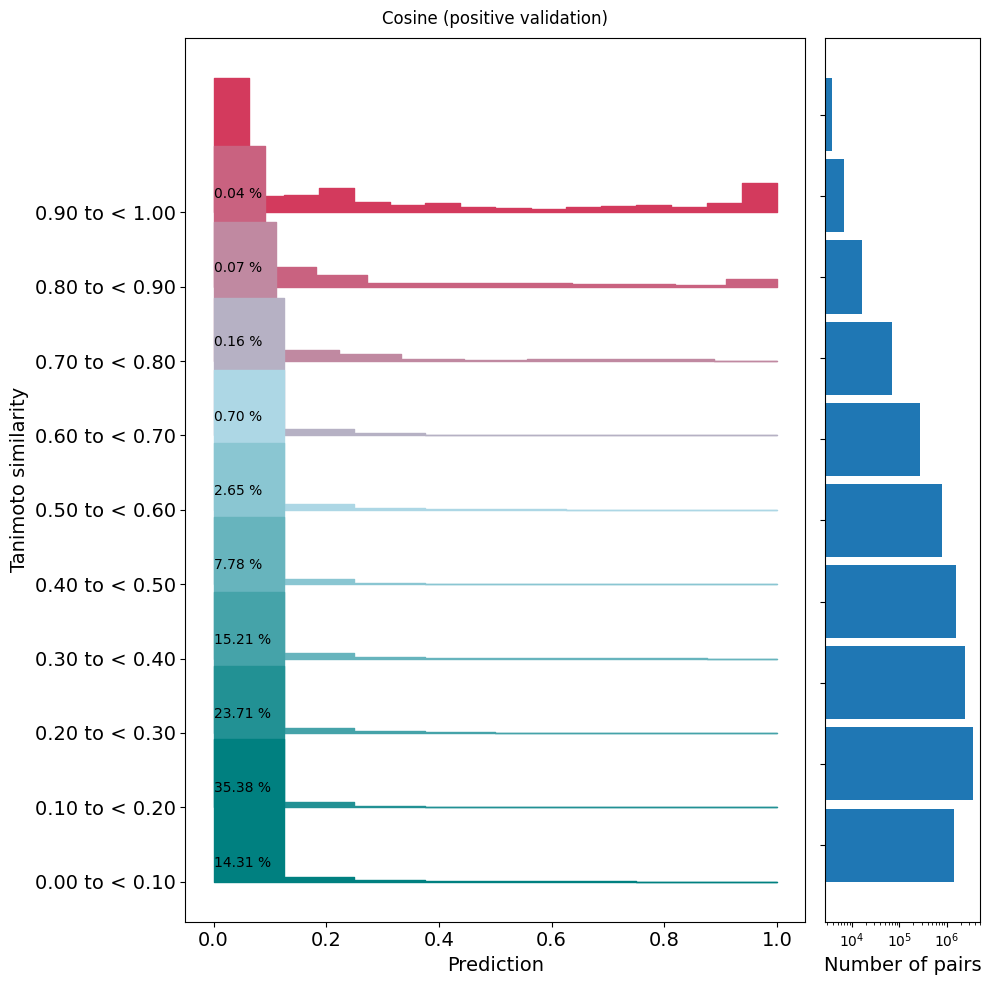

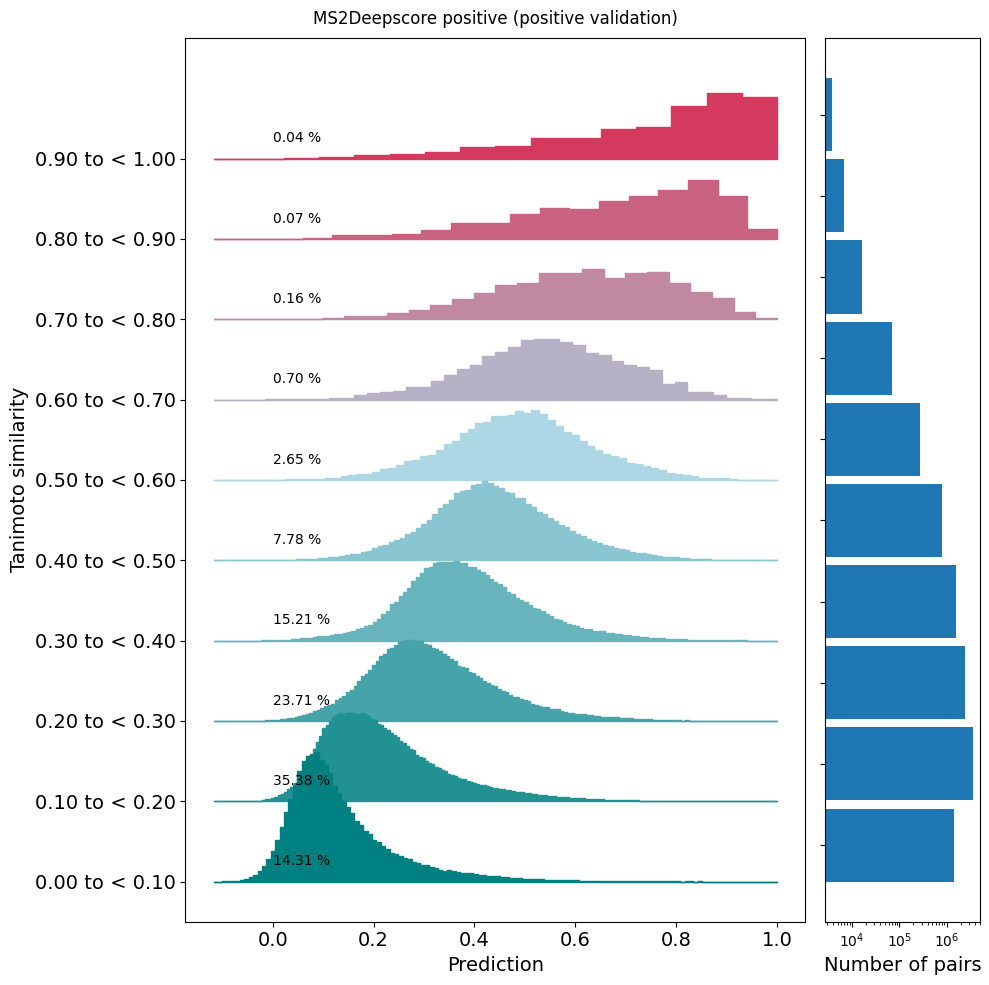

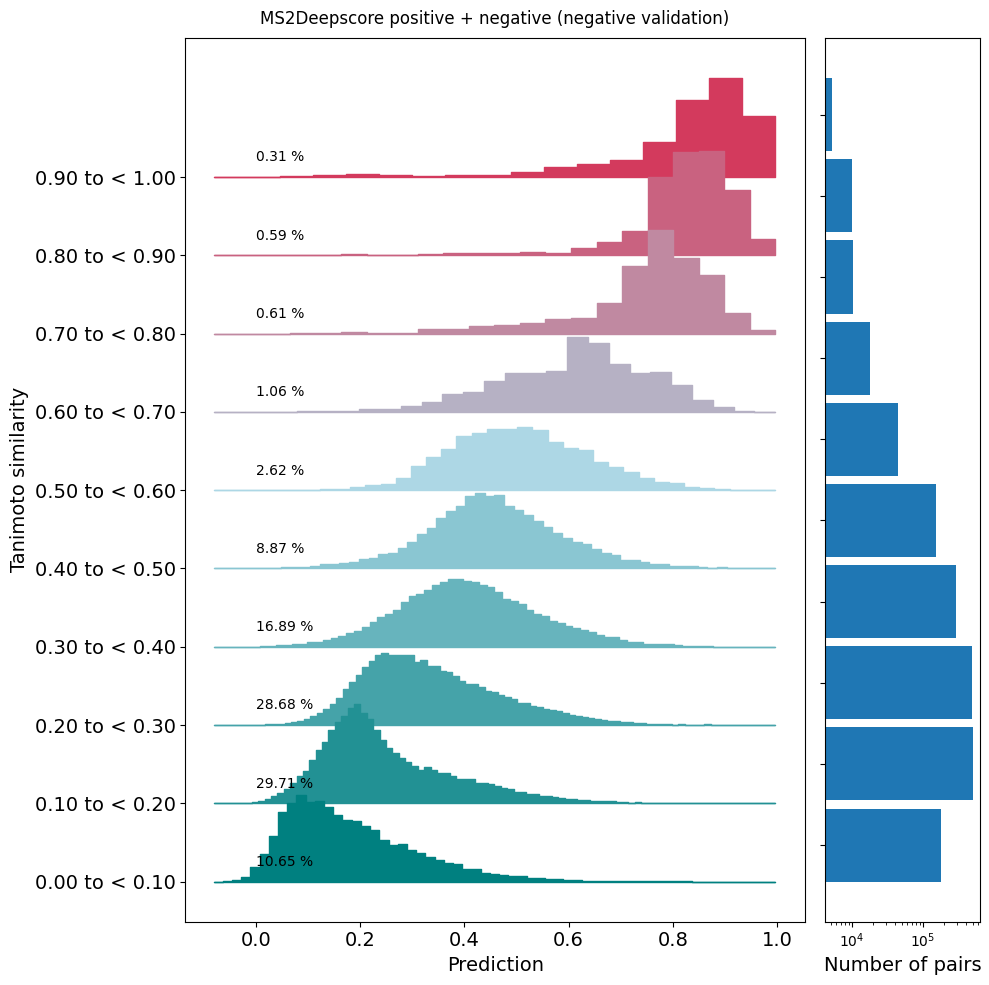

One peak was too high, trying 55 bins
One peak was too high, trying 49 bins
One peak was too high, trying 44 bins
One peak was too high, trying 40 bins
One peak was too high, trying 36 bins
One peak was too high, trying 32 bins
One peak was too high, trying 29 bins
One peak was too high, trying 26 bins
One peak was too high, trying 23 bins
One peak was too high, trying 20 bins
One peak was too high, trying 18 bins
One peak was too high, trying 16 bins
One peak was too high, trying 14 bins
One peak was too high, trying 12 bins
One peak was too high, trying 10 bins
One peak was too high, trying 9 bins
One peak was too high, trying 80 bins
One peak was too high, trying 72 bins
One peak was too high, trying 65 bins
One peak was too high, trying 59 bins
One peak was too high, trying 53 bins
One peak was too high, trying 48 bins
One peak was too high, trying 43 bins
One peak was too high, trying 39 bins
One peak was too high, trying 35 bins
One peak was too high, trying 31 bins
One peak was 

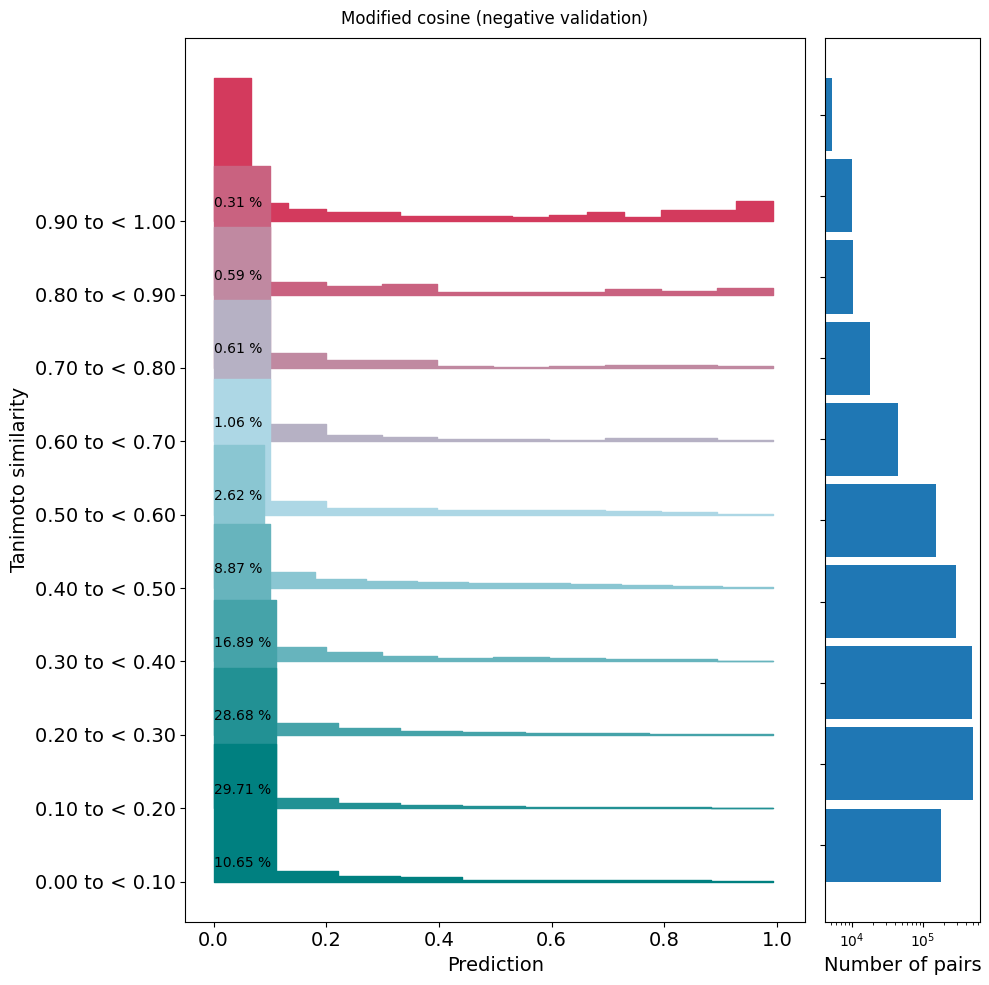

One peak was too high, trying 55 bins
One peak was too high, trying 49 bins
One peak was too high, trying 44 bins
One peak was too high, trying 40 bins
One peak was too high, trying 36 bins
One peak was too high, trying 32 bins
One peak was too high, trying 29 bins
One peak was too high, trying 26 bins
One peak was too high, trying 23 bins
One peak was too high, trying 20 bins
One peak was too high, trying 18 bins
One peak was too high, trying 16 bins
One peak was too high, trying 14 bins
One peak was too high, trying 12 bins
One peak was too high, trying 10 bins
One peak was too high, trying 9 bins
One peak was too high, trying 8 bins
One peak was too high, trying 80 bins
One peak was too high, trying 72 bins
One peak was too high, trying 65 bins
One peak was too high, trying 59 bins
One peak was too high, trying 53 bins
One peak was too high, trying 48 bins
One peak was too high, trying 43 bins
One peak was too high, trying 39 bins
One peak was too high, trying 35 bins
One peak was t

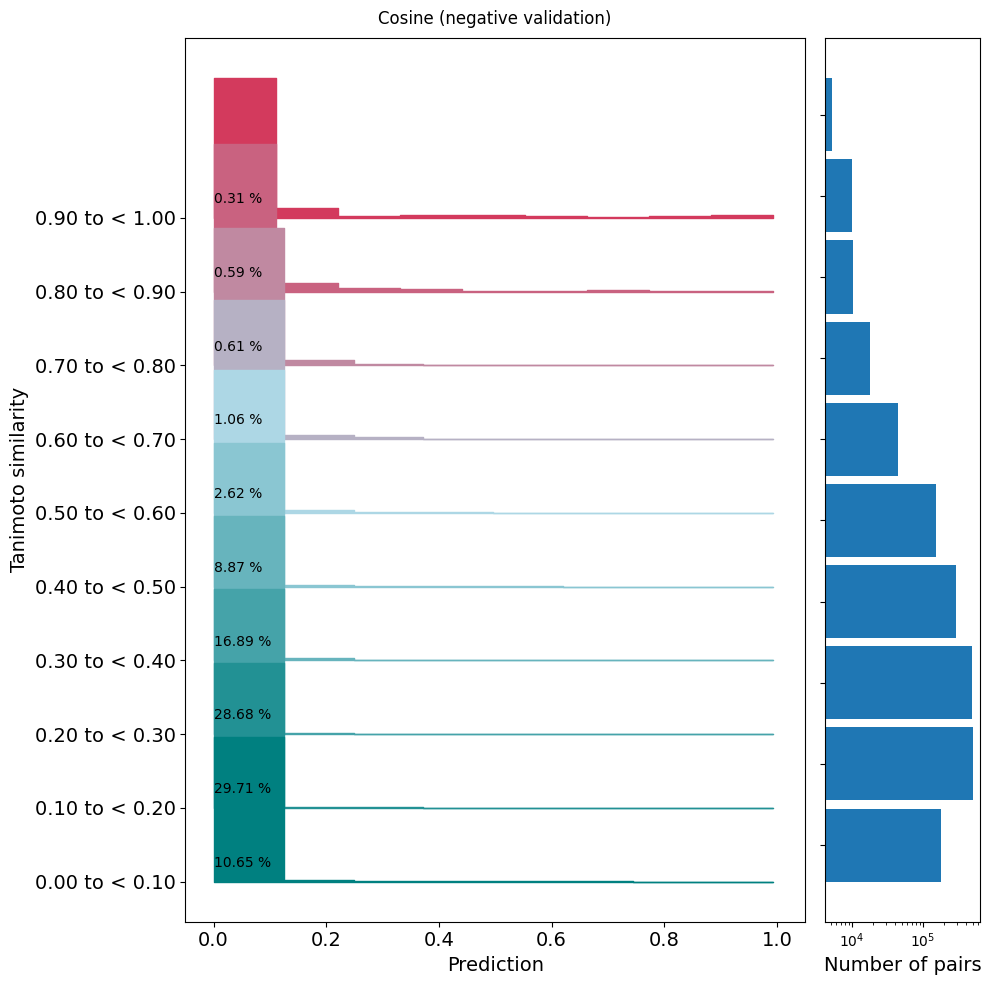

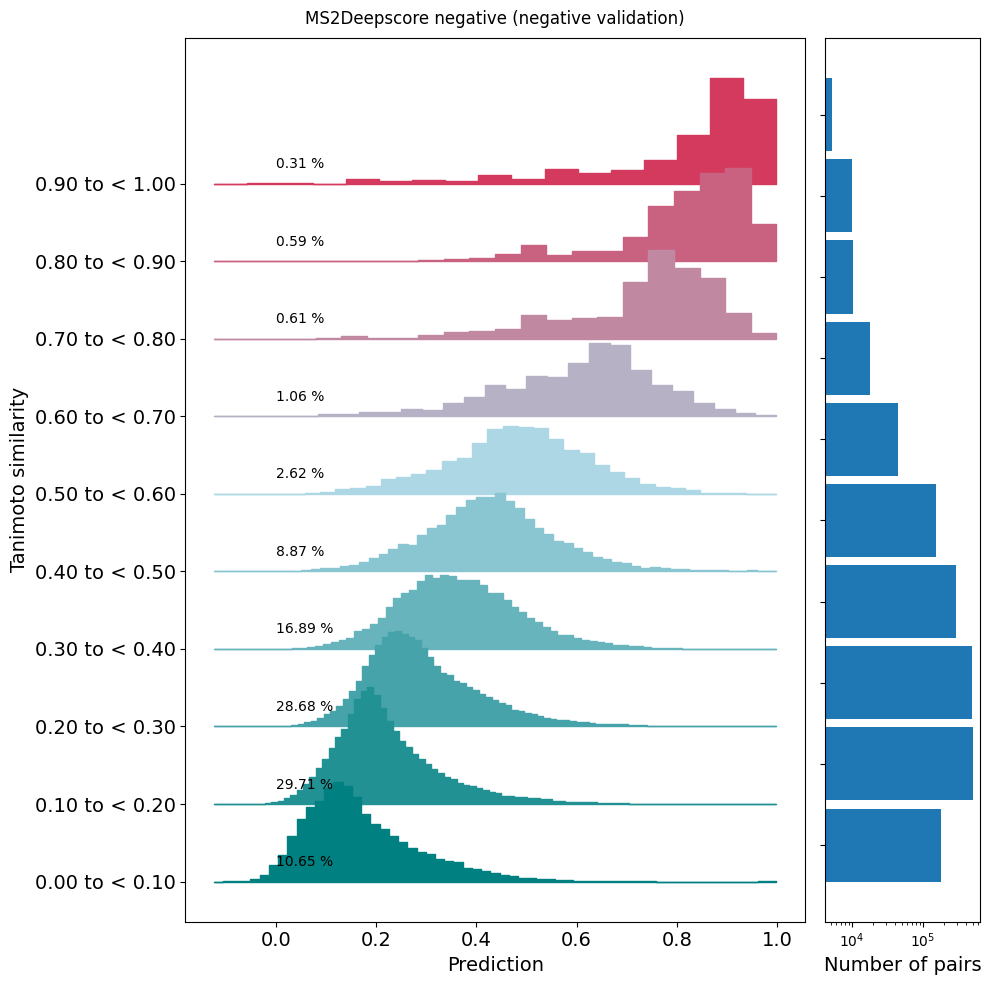

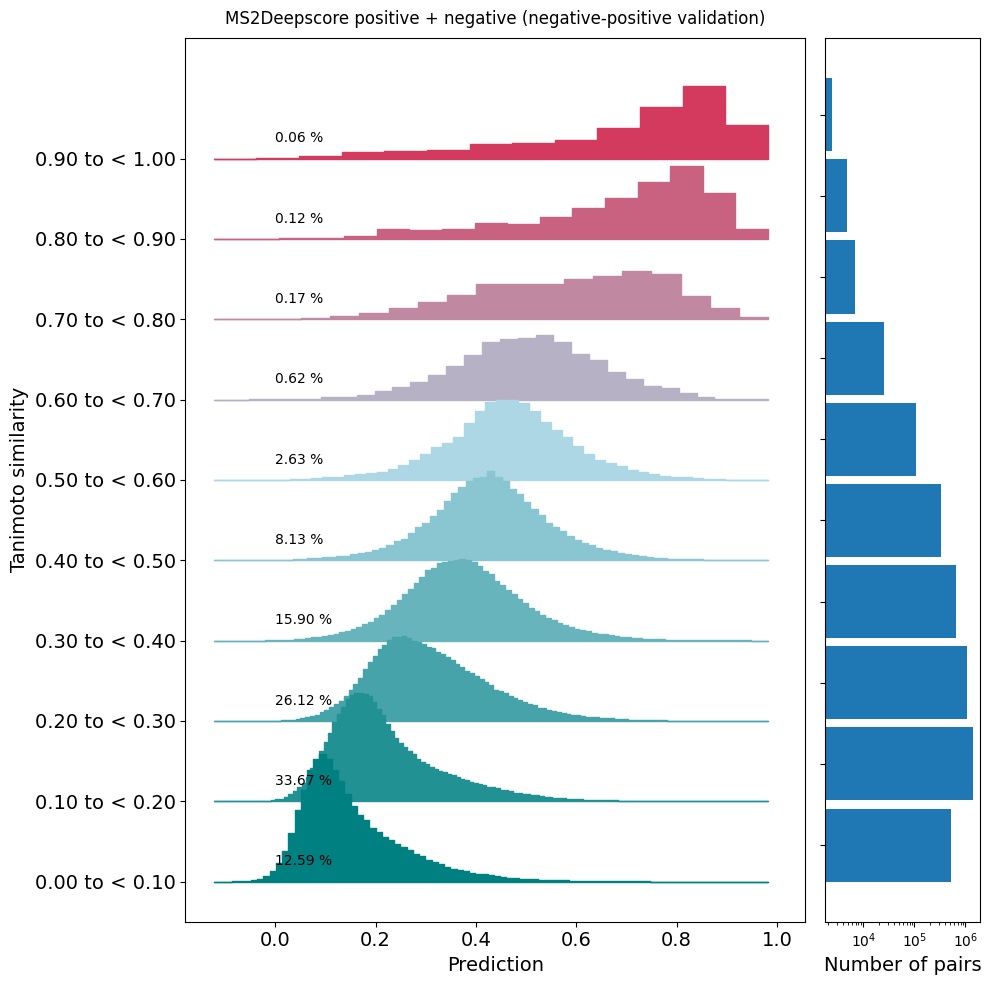

One peak was too high, trying 80 bins
One peak was too high, trying 72 bins
One peak was too high, trying 65 bins
One peak was too high, trying 59 bins
One peak was too high, trying 53 bins
One peak was too high, trying 48 bins
One peak was too high, trying 43 bins
One peak was too high, trying 39 bins
One peak was too high, trying 35 bins
One peak was too high, trying 31 bins
One peak was too high, trying 28 bins
One peak was too high, trying 25 bins
One peak was too high, trying 22 bins
One peak was too high, trying 20 bins
One peak was too high, trying 18 bins
One peak was too high, trying 16 bins
One peak was too high, trying 14 bins
One peak was too high, trying 12 bins
One peak was too high, trying 10 bins
One peak was too high, trying 9 bins
One peak was too high, trying 8 bins
One peak was too high, trying 114 bins
One peak was too high, trying 103 bins
One peak was too high, trying 93 bins
One peak was too high, trying 84 bins
One peak was too high, trying 76 bins
One peak was

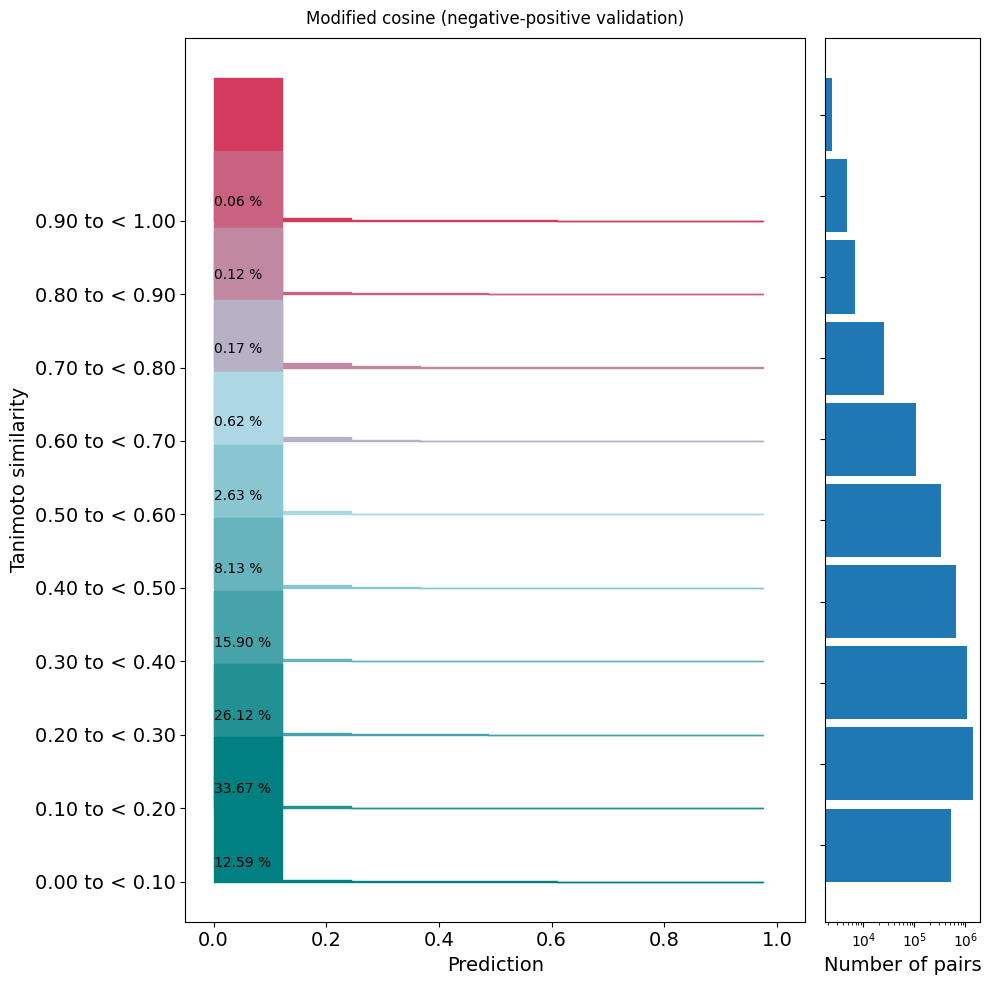

One peak was too high, trying 80 bins
One peak was too high, trying 72 bins
One peak was too high, trying 65 bins
One peak was too high, trying 59 bins
One peak was too high, trying 53 bins
One peak was too high, trying 48 bins
One peak was too high, trying 43 bins
One peak was too high, trying 39 bins
One peak was too high, trying 35 bins
One peak was too high, trying 31 bins
One peak was too high, trying 28 bins
One peak was too high, trying 25 bins
One peak was too high, trying 22 bins
One peak was too high, trying 20 bins
One peak was too high, trying 18 bins
One peak was too high, trying 16 bins
One peak was too high, trying 14 bins
One peak was too high, trying 12 bins
One peak was too high, trying 10 bins
One peak was too high, trying 9 bins
One peak was too high, trying 8 bins
One peak was too high, trying 114 bins
One peak was too high, trying 103 bins
One peak was too high, trying 93 bins
One peak was too high, trying 84 bins
One peak was too high, trying 76 bins
One peak was

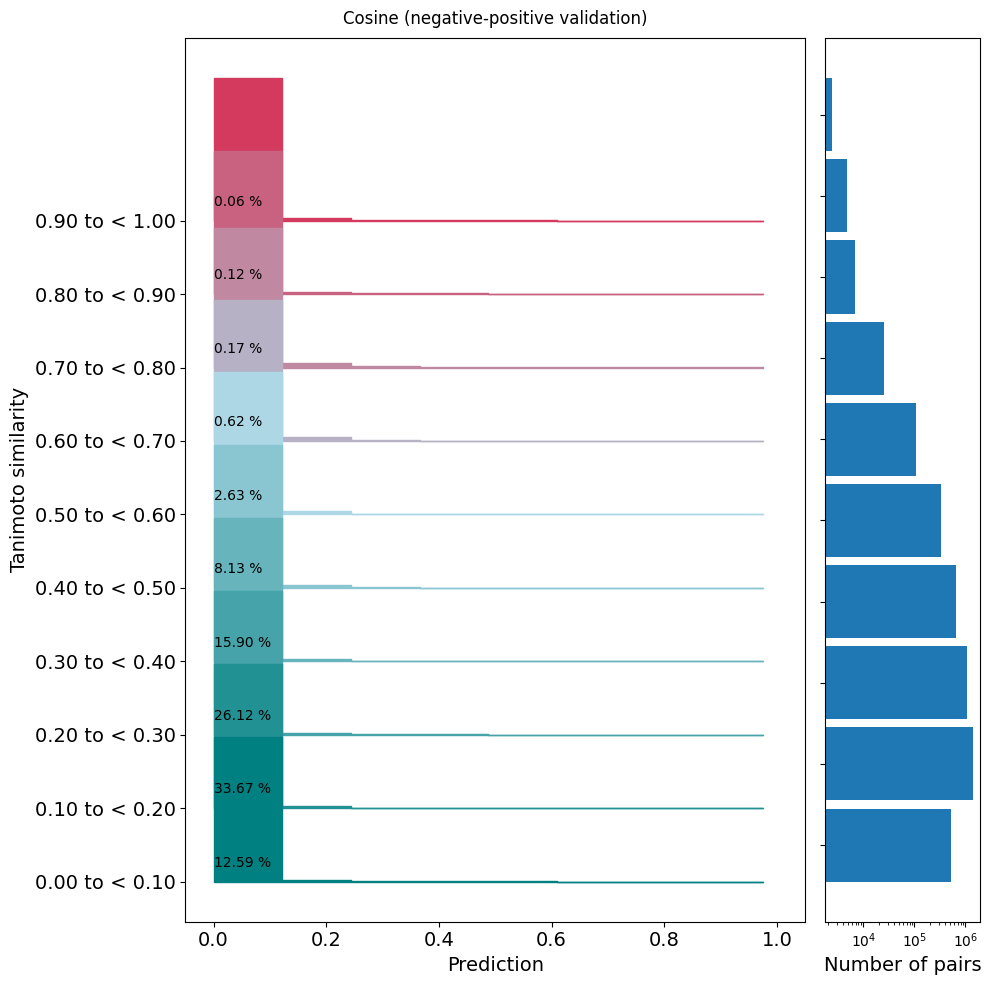

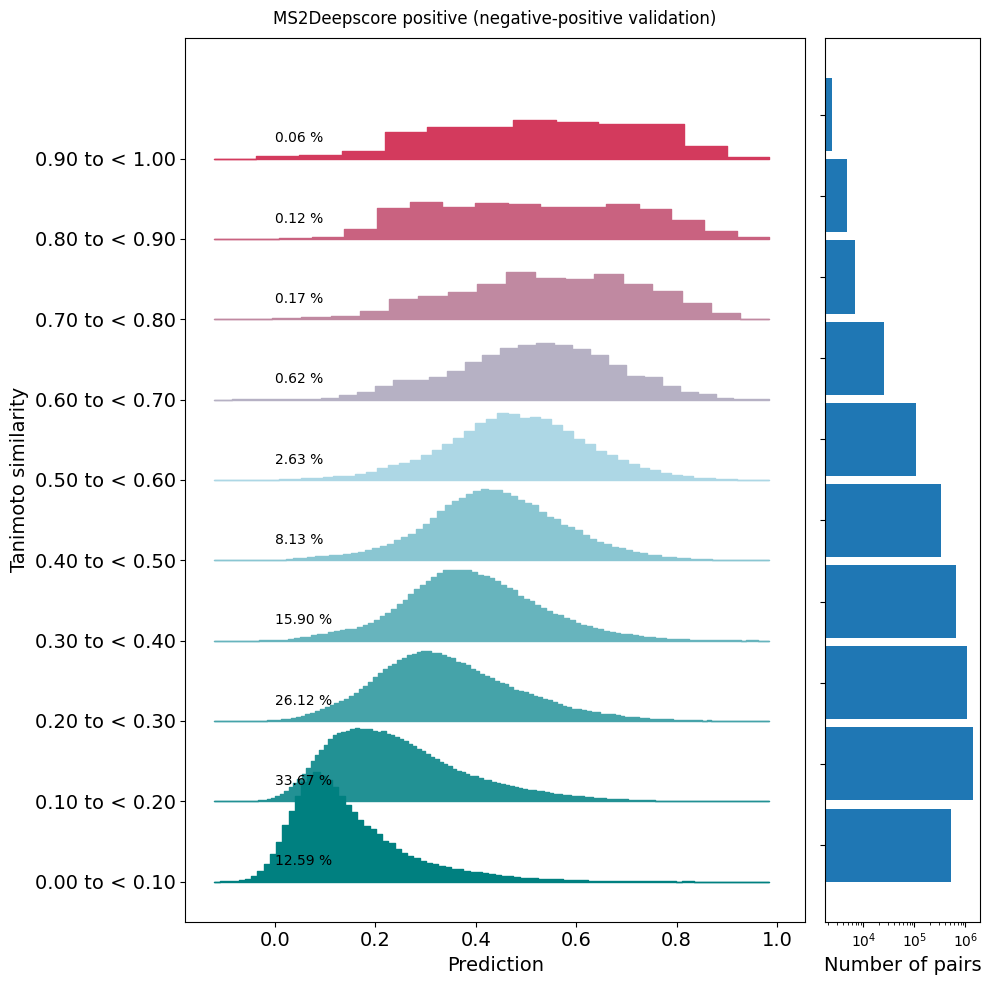

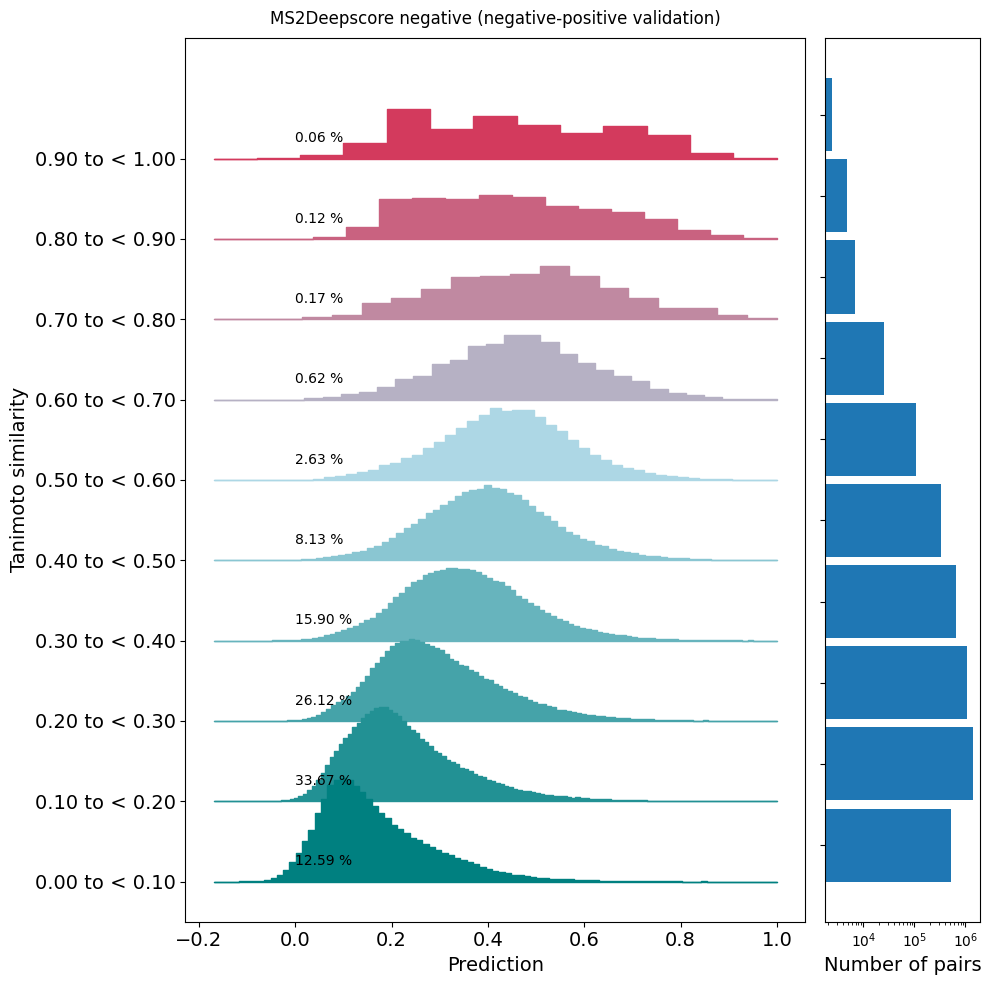

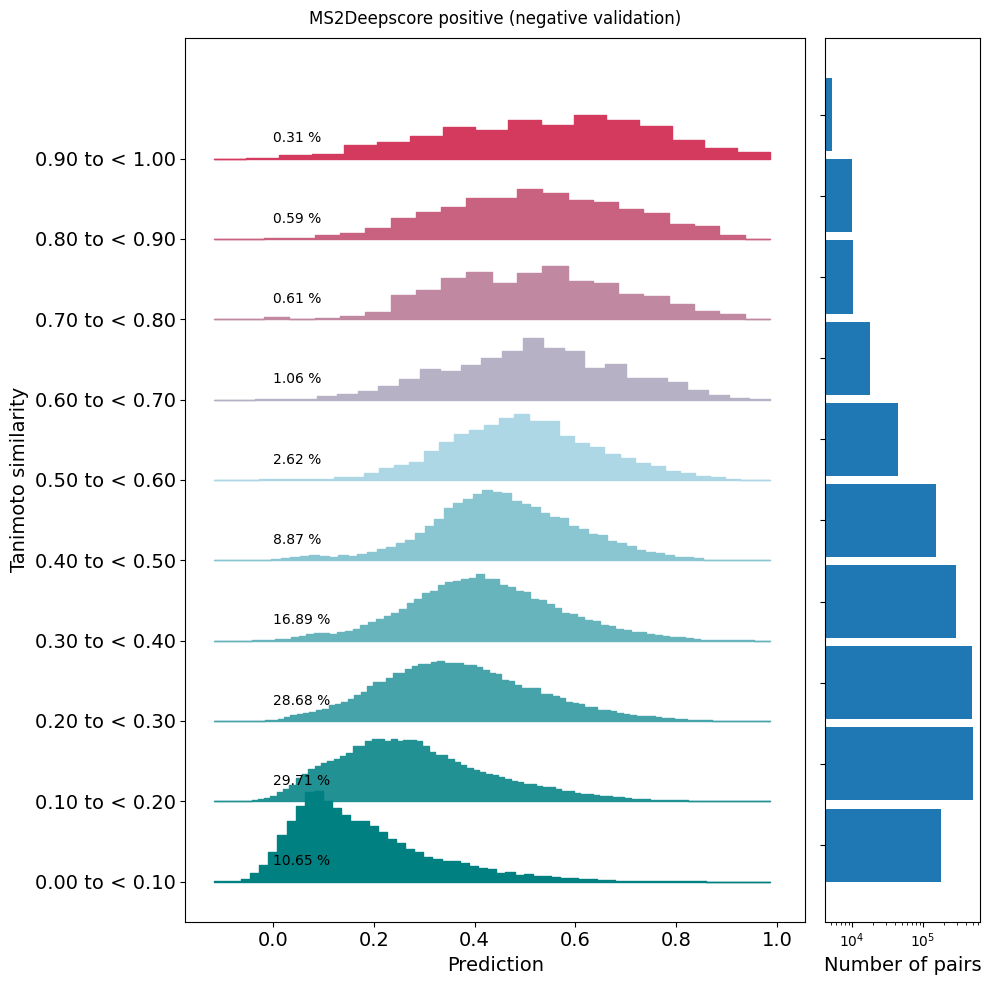

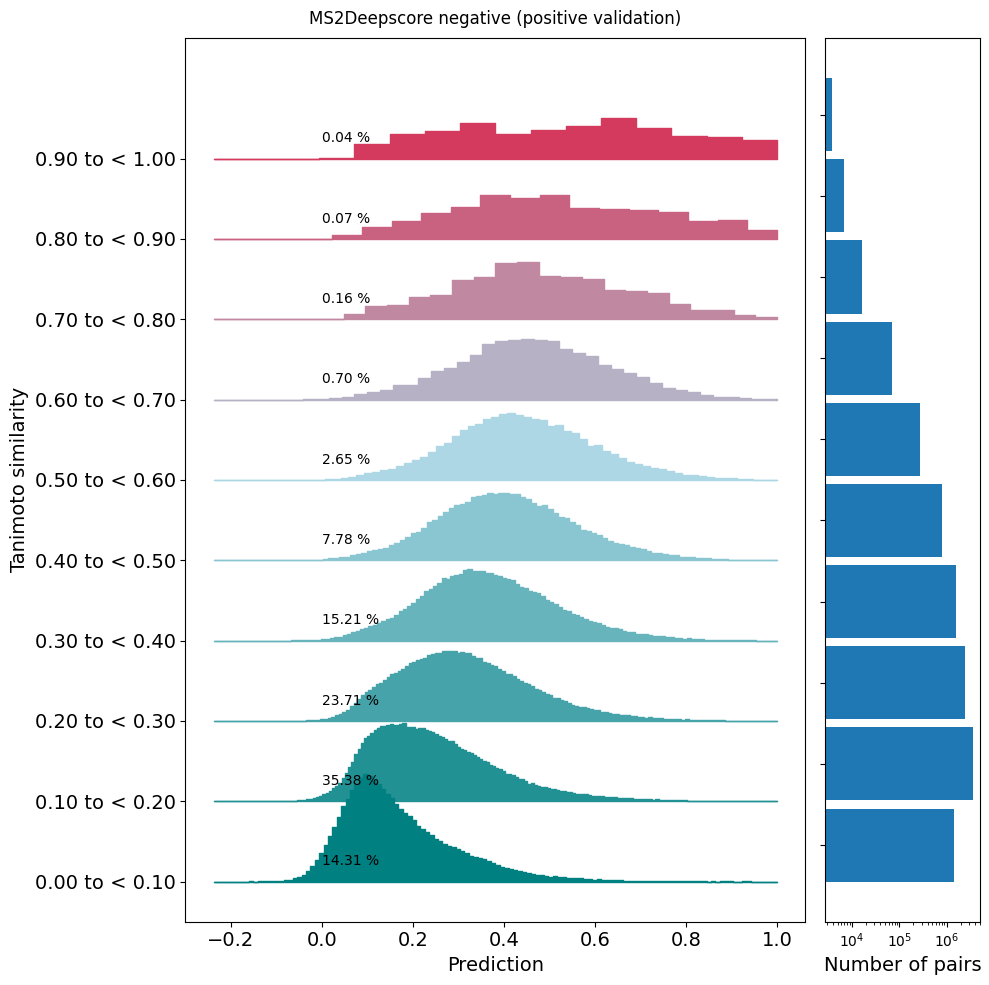

In [14]:
# from ms2deepscore.benchmarking.plot_stacked_histogram import plot_stacked_histogram_plot_wrapper
import matplotlib.pyplot as plt

plot_stacked_histogram_plot_wrapper(pos_combined_true_values, sampled_pos_both_mode, n_bins=10, title="MS2Deepscore positive + negative (positive validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(pos_combined_true_values, sampled_mod_pos_cosine, n_bins=10, title="Modified cosine (positive validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(pos_combined_true_values, sampled_pos_cosine, n_bins=10, title="Cosine (positive validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(pos_combined_true_values, sampled_pos_predictions_pos_mode, n_bins=10, title="MS2Deepscore positive (positive validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_combined_true_values, sampled_neg_both_mode, n_bins=10, title="MS2Deepscore positive + negative (negative validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_combined_true_values, sampled_mod_neg_cosine, n_bins=10, title="Modified cosine (negative validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_combined_true_values, sampled_neg_cosine, n_bins=10, title="Cosine (negative validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_combined_true_values, sampled_neg_predictions_neg_mode, n_bins=10, title="MS2Deepscore negative (negative validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_pos_combined_true_values, sampled_neg_pos_both_mode, n_bins=10, title="MS2Deepscore positive + negative (negative-positive validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_pos_combined_true_values, sampled_neg_pos_mod_cosine, n_bins=10, title="Modified cosine (negative-positive validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_pos_combined_true_values, sampled_neg_pos_cosine, n_bins=10, title="Cosine (negative-positive validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_pos_combined_true_values, sampled_neg_pos_predictions_pos_mode, n_bins=10, title="MS2Deepscore positive (negative-positive validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_pos_combined_true_values, sampled_neg_pos_predictions_neg_mode, n_bins=10, title="MS2Deepscore negative (negative-positive validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(neg_combined_true_values, sampled_neg_predictions_pos_mode, n_bins=10, title="MS2Deepscore positive (negative validation)")
plt.show()
plot_stacked_histogram_plot_wrapper(pos_combined_true_values, sampled_pos_predictions_neg_mode, n_bins=10, title="MS2Deepscore negative (positive validation)")
plt.show()


## Plot RMSE per bin comparison

In [61]:
import numpy as np
from matplotlib import pyplot as plt
from ms2deepscore.models.loss_functions import bin_dependent_losses

def plot_rmse_per_bin_multiple_benchmarks(list_of_predicted_scores,
                                          list_of_true_values,
                                          labels,
                                          ref_score_bins=np.array([(x / 10, x / 10 + 0.1) for x in range(0, 10)]),
                                         title=""):
    """Combines the plot of multiple comparisons into one plot

    """
    if not len(list_of_true_values) == len(list_of_true_values) == len(labels):
        raise ValueError("The number of predicted scores and true values should be equal.")
    fig, ax1 = plt.subplots(1, 1, sharex=True,
                                   figsize=(8, 3), dpi=120)
    for i, true_values in enumerate(list_of_true_values):
        bin_content, bounds, losses = bin_dependent_losses(
            list_of_predicted_scores[i],
            true_values,
            ref_score_bins,
            loss_types=["rmse"]
            )
        rmses = losses["rmse"]
        ax1.plot(np.arange(len(rmses)), rmses, "o:")
        # ax2.plot(np.arange(len(rmses)), bin_content, "o:")
    ax1.legend(labels, loc="best")
    ax1.set_title(title)
    ax1.set_ylabel("RMSE")
    ax1.grid(True)

    # ax2.set_title('# of spectrum pairs')
    # ax2.set_ylabel("# of spectrum pairs")
    ax1.set_xlabel("Tanimoto score bin")
    ax1.set_ylim(bottom=0, top=0.55)
    # ax2.set_yscale("log")
    plt.xticks(np.arange(len(ref_score_bins)),
               [f"{a:.1f} - {b:.1f}" for (a, b) in bounds], fontsize=9, rotation='vertical')
    # ax2.grid(True)
    plt.tight_layout(rect=[0, 0, 0.75, 1])

def plot_tanimoto_score_distribution(list_of_predicted_scores,
                                     list_of_true_values,
                                     labels,
                                     ref_score_bins=np.array([(x / 10, x / 10 + 0.1) for x in range(0, 10)]),
                                     title=""):
    """Combines the plot of multiple comparisons into one plot

    """
    if not len(list_of_true_values) == len(list_of_true_values) == len(labels):
        raise ValueError("The number of predicted scores and true values should be equal.")
    fig, ax2 = plt.subplots(1, 1, sharex=True,
                                   figsize=(8, 3), dpi=120)
    for i, true_values in enumerate(list_of_true_values):
        bin_content, bounds, losses = bin_dependent_losses(
            list_of_predicted_scores[i],
            true_values,
            ref_score_bins,
            loss_types=["rmse"]
            )
        rmses = losses["rmse"]
        # ax1.plot(np.arange(len(rmses)), rmses, "o:")
        ax2.plot(np.arange(len(rmses)), bin_content, "o:")
    ax2.legend(labels, loc="best")
    ax2.set_title(title)

    ax2.set_title('# of spectrum pairs')
    ax2.set_ylabel("# of spectrum pairs")
    ax2.set_xlabel("Tanimoto score bin")
    # ax2.set_ylim(bottom=0)
    ax2.set_yscale("log")
    plt.xticks(np.arange(len(ref_score_bins)),
               [f"{a:.1f} - {b:.1f}" for (a, b) in bounds], fontsize=9, rotation='vertical')
    ax2.grid(True)
    plt.tight_layout(rect=[0, 0, 0.75, 1])

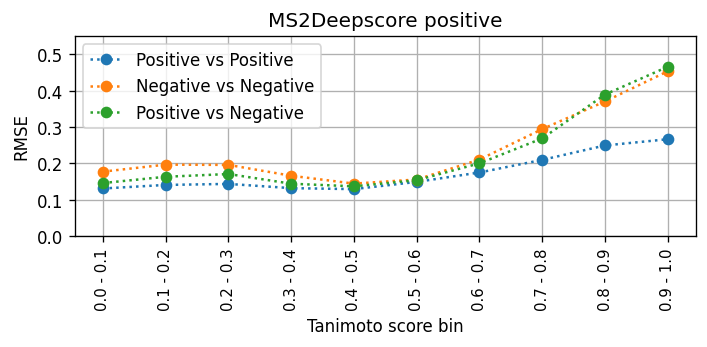

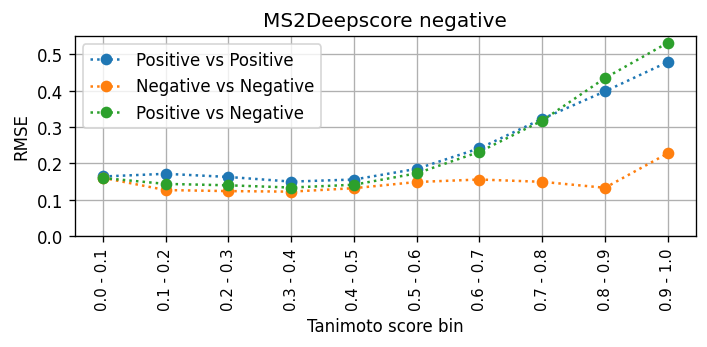

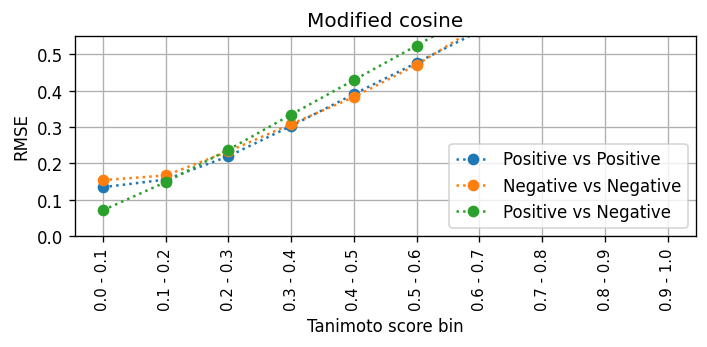

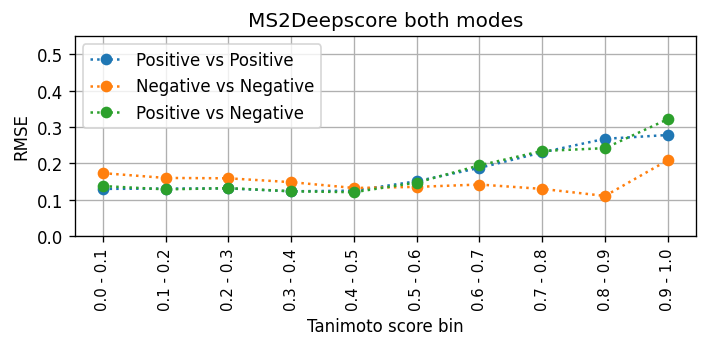

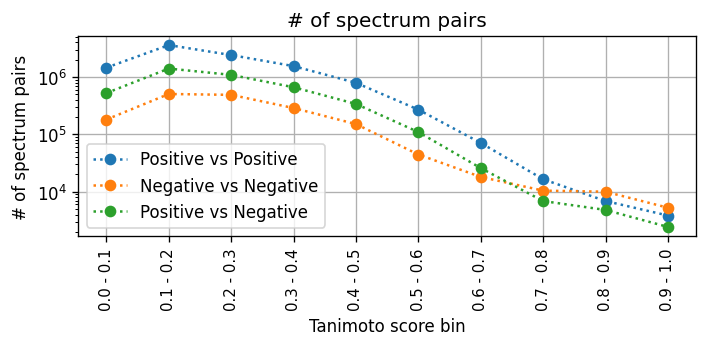

In [62]:
plot_rmse_per_bin_multiple_benchmarks(
    [sampled_pos_predictions_pos_mode, sampled_neg_predictions_pos_mode, sampled_neg_pos_predictions_pos_mode], 
    [pos_combined_true_values, neg_combined_true_values, neg_pos_combined_true_values], 
    ["Positive vs Positive", "Negative vs Negative", "Positive vs Negative"], title="MS2Deepscore positive")
plot_rmse_per_bin_multiple_benchmarks(
    [sampled_pos_predictions_neg_mode, sampled_neg_predictions_neg_mode, sampled_neg_pos_predictions_neg_mode], 
    [pos_combined_true_values, neg_combined_true_values, neg_pos_combined_true_values], 
    ["Positive vs Positive", "Negative vs Negative", "Positive vs Negative"], title="MS2Deepscore negative")
plot_rmse_per_bin_multiple_benchmarks(
    [sampled_mod_pos_cosine, sampled_mod_neg_cosine, sampled_neg_pos_mod_cosine], 
    [pos_combined_true_values, neg_combined_true_values, neg_pos_combined_true_values], 
    ["Positive vs Positive", "Negative vs Negative", "Positive vs Negative"], title="Modified cosine")
plot_rmse_per_bin_multiple_benchmarks(
    [sampled_pos_both_mode, sampled_neg_both_mode, sampled_neg_pos_both_mode], 
    [pos_combined_true_values, neg_combined_true_values, neg_pos_combined_true_values], 
    ["Positive vs Positive", "Negative vs Negative", "Positive vs Negative"], title="MS2Deepscore both modes")
plot_tanimoto_score_distribution(
    [sampled_pos_both_mode, sampled_neg_both_mode, sampled_neg_pos_both_mode], 
    [pos_combined_true_values, neg_combined_true_values, neg_pos_combined_true_values], 
    ["Positive vs Positive", "Negative vs Negative", "Positive vs Negative"], title="MS2Deepscore both modes")

## Exact matches performance

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def remove_diagonal(matrix):
    """Removes the diagonal from a matrix

    meant for removing matches of spectra against itself. """
    # Get the number of rows and columns
    nr_of_rows, nr_of_cols = matrix.shape
    if nr_of_rows != nr_of_cols:
        raise ValueError("Expected predictions against itself")

    # Create a mask for the diagonal elements
    diagonal_mask = np.eye(nr_of_rows, dtype=bool)
    # Use the mask to remove the diagonal elements
    matrix_without_diagonal = matrix[~diagonal_mask].reshape(nr_of_rows, nr_of_cols - 1)
    return matrix_without_diagonal

def select_indexes_per_inchikey(inchikey, val_spectra):
    matching_spectrum_ids = []
    for spectrum_id, spectrum in enumerate(val_spectra):
        if spectrum.get("inchikey")[:14] == inchikey:
            matching_spectrum_ids.append(spectrum_id)
    return matching_spectrum_ids

def select_inchikeys(val_spectra):
    list_of_inchikeys = []
    for spectrum in val_spectra:
        inchikey = spectrum.get("inchikey")[:14]
        list_of_inchikeys.append(inchikey)
    return np.array(list_of_inchikeys)
    
def select_matrixes_per_inchikey(val_spectra, predicted_values, include_diagonal):
    inchikeys = select_inchikeys(val_spectra)
    mean_predictions_per_inchikey = []
    for inchikey in np.unique(inchikeys):
        matching_spectrum_ids = np.where(inchikeys == inchikey)[0]
        matrix_of_predictions_for_inchikey = predicted_values[matching_spectrum_ids][:,  matching_spectrum_ids]
        if include_diagonal is False:
            matrix_of_predictions_for_inchikey = remove_diagonal(matrix_of_predictions_for_inchikey)
        if matrix_of_predictions_for_inchikey.shape[1] > 0:
            max_per_row = np.max(matrix_of_predictions_for_inchikey, axis=1)
            mean_prediction = np.mean(matrix_of_predictions_for_inchikey)
            mean_predictions_per_inchikey.append(mean_prediction)
    return mean_predictions_per_inchikey

def plot_mean_prediction_between_same_inchikey(val_spectra, predicted_values, include_diagonal):
    mean_predictions_per_inchikey = select_matrixes_per_inchikey(val_spectra, predicted_values, include_diagonal)
    hist, bins = np.histogram(mean_predictions_per_inchikey, bins=np.linspace(0,1, 6))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, hist)

def plot_multiple_mean_predictions(val_spectra, list_of_predicted_values, title, labels):
    for predicted_values in list_of_predicted_values:
        plot_mean_prediction_between_same_inchikey(val_spectra, predicted_values, False)
        # fig, ax2 = plt.subplots(1, 1, sharex=True,
    #                            figsize=(8, 3), dpi=120)
    # ax2.hist(mean_predictions_per_inchikey, np.linspace(0,1, 21), rwidth=0.9)
    plt.ylabel("Count")
    plt.xlabel("Average prediction per inchikey")
    plt.legend(labels)
    plt.title(title)
    plt.show()

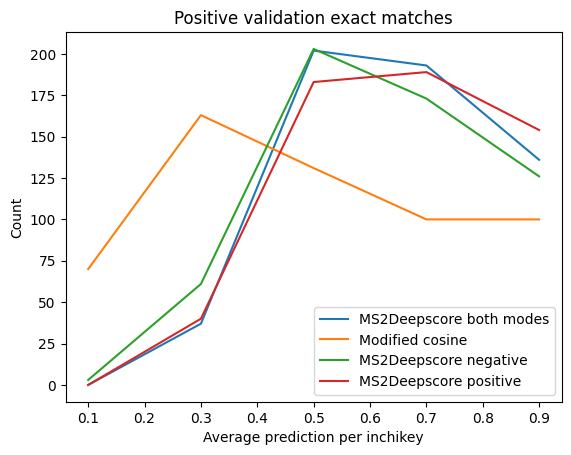

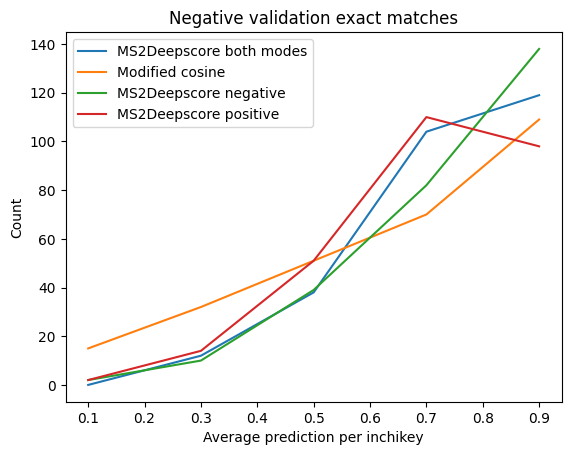

In [126]:
plot_multiple_mean_predictions(pos_spectra, [pos_predictions_both_mode, pos_mod_cosine_predictions, pos_predictions_neg_mode, pos_predictions_pos_mode], 
                               title="Positive validation exact matches", 
                               labels=["MS2Deepscore both modes", "Modified cosine", "MS2Deepscore negative", "MS2Deepscore positive"])
plot_multiple_mean_predictions(neg_spectra, [neg_predictions_both_mode, neg_mod_cosine_predictions, neg_predictions_neg_mode, neg_predictions_pos_mode], 
                               title="Negative validation exact matches", 
                               labels=["MS2Deepscore both modes", "Modified cosine", "MS2Deepscore negative", "MS2Deepscore positive"])

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def get_mean_prediciton_between_ionmodes(val_spectra_1, val_spectra_2, predicted_values):
    inchikeys_1 = select_inchikeys(val_spectra_1)
    inchikeys_2 = select_inchikeys(val_spectra_2)

    mean_predictions_per_inchikey = []
    for inchikey in np.unique(np.concatenate((inchikeys_1, inchikeys_2))):
        matching_spectrum_ids_1 = np.where(inchikeys_1 == inchikey)[0]
        matching_spectrum_ids_2 = np.where(inchikeys_2 == inchikey)[0]
        if len(matching_spectrum_ids_1) > 0 and len(matching_spectrum_ids_2) > 0: 
            matrix_of_predictions_for_inchikey = predicted_values[matching_spectrum_ids_1][:,  matching_spectrum_ids_2]
            max_per_row = np.max(matrix_of_predictions_for_inchikey, axis=1)
            mean_prediction = np.mean(matrix_of_predictions_for_inchikey)
            mean_predictions_per_inchikey.append(mean_prediction)
    return mean_predictions_per_inchikey

def plot_multiple_mean_predictions_between_ionmodes(val_spectra_1, val_spectra_2, list_of_predicted_values, title, labels):
    for predicted_values in list_of_predicted_values:
        mean_predictions_per_inchikey = get_mean_prediciton_between_ionmodes(val_spectra_1, val_spectra_2, predicted_values)
        hist, bins = np.histogram(mean_predictions_per_inchikey, bins=np.linspace(0,1, 11))
        bin_centers = (bins[:-1] + bins[1:]) / 2
        plt.plot(bin_centers, hist)
    plt.ylabel("Count")
    plt.xlabel("Average prediction per inchikey")
    plt.legend(labels)
    plt.title(title)
    plt.show()

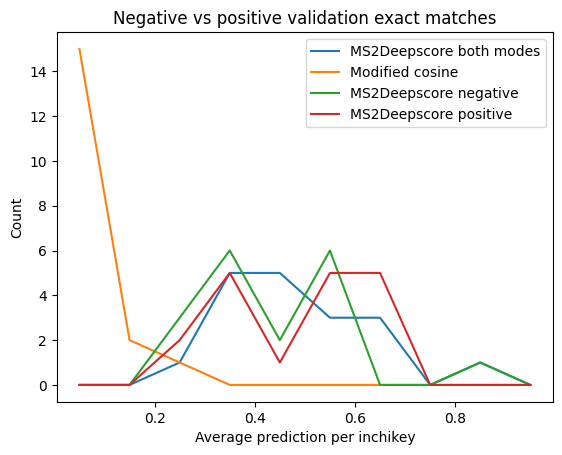

In [132]:
plot_multiple_mean_predictions_between_ionmodes(neg_spectra, pos_spectra, [neg_pos_predictions_both_mode, neg_pos_mod_cosines_predictions, neg_pos_predictions_neg_mode, neg_pos_predictions_pos_mode], 
                               title="Negative vs positive validation exact matches", 
                               labels=["MS2Deepscore both modes", "Modified cosine", "MS2Deepscore negative", "MS2Deepscore positive"])